In [1]:
import h5py as hdf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
import glob

In [2]:
#specData = hdf.File("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-12832-Eps084/N2-12832-Eps084/N2-12832-Eps084restart00619883.h5","r")
specData = hdf.File("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-128128-Eps084/N2-128128-Eps084restart00590883.h5","r")

In [3]:
def spec(path):
    specData = hdf.File(path,"r")
    
    u = specData['u']
    v = specData['v']
    w = specData['w']
    fx = specData['fx']
    fz = specData['fz']

    Nx = specData['nx'][0]
    Ny = specData['ny'][0]
    Nz = specData['nz'][0]

    Lx = specData['LMFx'][0]
    Ly = specData['LMFy'][0]
    Lz = specData['LMFz'][0]
    
    nu = specData['nu'][0]

    forceVar = np.zeros(128)
    powerSpec = np.zeros(128)
    energySpec = np.zeros(128)
    diss = 0.0
    
    yBoxScale = Ly

    print("Analyzing dataset...")

    weightsFxn = lambda k, j, i: 1.0 + np.ceil(j/1000)
    weights = np.fromfunction(np.vectorize(weightsFxn), (int(Nz), int(Nx/2), int(Ny)), dtype=float)
        
    ksqFxn = lambda k, j, i: j*j + \
                             ((i/yBoxScale) % (Nx/2) - np.floor(2*i/(Nx*yBoxScale))*Nx/2)**2 + \
                             (k % (Nz/2) - np.floor(2*k/Nz)*Nz/2)**2
    ksq = np.fromfunction(np.vectorize(ksqFxn), (int(Nz), int(Nx/2), int(Ny)), dtype=float)
    
    eneU = 0.5*(np.multiply(u[:,:,:,0],u[:,:,:,0]) + np.multiply(u[:,:,:,1],u[:,:,:,1]))
    eneV = 0.5*(np.multiply(v[:,:,:,0],v[:,:,:,0]) + np.multiply(v[:,:,:,1],v[:,:,:,1]))
    eneW = 0.5*(np.multiply(w[:,:,:,0],w[:,:,:,0]) + np.multiply(w[:,:,:,1],w[:,:,:,1]))
    tmp = eneU + eneV + eneW
    ene = np.multiply(tmp, weights)
    
    diss = np.multiply(ene, ksq)
    diss = 2 * nu * diss
        
    for iy in range(0,int(Ny)):
        ky = iy * 1.0/Ly
        if (iy > Ny/2): ky = (iy - Ny) * 1.0/Ly

        for ix in range(0,int(Nx/2)):
            weight = 2
            kx = ix * 1.0/Lx
            if (ix == 0): weight = 1

            for iz in range(0,int(Nz)):
                kz = iz * 1.0/Lz
                if (iz > Nz/2): kz = (iz - Nz) * 1.0/Lz

                #if (ky != 0): continue

                ksquared = kx*kx + ky*ky + kz*kz
                kh_mag = np.sqrt(kx*kx + kz*kz)

                fxhat = fx[iz][ix][iy]
                fzhat = fz[iz][ix][iy]
                uhat = u[iz][ix][iy]
                vhat = v[iz][ix][iy]
                what = w[iz][ix][iy]

                fVar = 0.5 * (fxhat[0] * fxhat[0] + fxhat[1] * fxhat[1] + fzhat[0] * fzhat[0] + fzhat[1] * fzhat[1])
                power = uhat[0] * fxhat[0] + uhat[1] * fxhat[1] + what[0] * fzhat[0] + what[1] * fzhat[1]
                ene = 0.5 * (uhat[0] * uhat[0] + uhat[1] * uhat[1] + vhat[0] * vhat[0] + vhat[1] * vhat[1] + 
                      what[0] * what[0] + what[1] * what[1])
                diss = diss + 2 * ene * ksquared * nu * weight
                
                binH = int(kh_mag + 0.5)
                #print(kx, ky, kz, ksquared, ksq[iz][ix][iy], weight, weights[iz][ix][iy])

                forceVar[binH] = forceVar[binH] + fVar * weight
                powerSpec[binH] = powerSpec[binH] + power * weight
                energySpec[binH] = energySpec[binH] + ene * weight
                
                if (diss != )

    print("Generating Plots...")

    f, powPlot = plt.subplots()
    powPlot.plot(powerSpec)
    powPlot.set_xlim(-0.1,6)
    plt.show()
    
    f, enePlot = plt.subplots()
    enePlot.plot(energySpec)
    enePlot.set_yscale('log')
    enePlot.set_xlim(0,Nx)
    plt.show()
    
    print (specData['time'][0], diss)
    return [forceVar, powerSpec, energySpec]

SyntaxError: invalid syntax (<ipython-input-3-6950065043ef>, line 83)

Analyzing dataset...
Generating Plots...


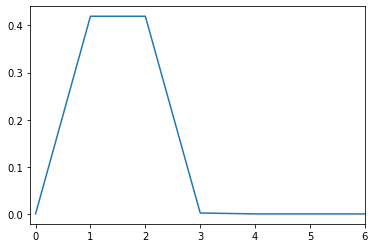

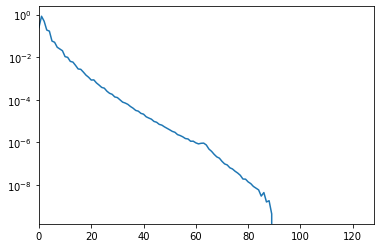

138.30878542537403 0.5918569409942076


In [318]:
plts = spec("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-128128-Eps084/N2-128128-Eps084restart00590883.h5")

Analyzing dataset...
Generating Plots...


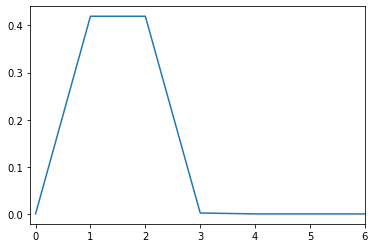

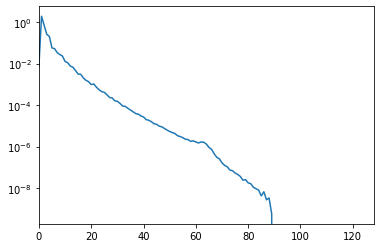

214.01461959777544 0.6788668670140549


In [319]:
plts = spec("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-12832-Eps084/N2-12832-Eps084/N2-12832-Eps084restart00636883.h5")

In [4]:
import os
import sys
import glob

print ("Generating file list...")
#fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-12832-Eps084/N2-12832-Eps084/*.h5") 
fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-12832-Eps084-0330/*.h5") 
#fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-128128-Eps084/*.h5") 

summaryData = []

first = True
for file in fileList:
    specData = hdf.File(file,"r")
    u = specData.get('u')[()]
    v = specData.get('v')[()]
    w = specData.get('w')[()]
    r = specData.get('rho')[()]

    nx = specData.get('nx')[()]
    ny = specData.get('ny')[()]
    nz = specData.get('nz')[()]
    
    time = specData.get('time')[()]

    yBoxScale = specData.get('LMFy')[()]
        
    nu = specData.get('nu')[()]
    diff = specData.get('diff')[()]
    grav = specData.get('grav')[()]
    gradv = specData.get('gradv')[()]
    
    if (first):
        print ("Calculating work arrays...")
        weightsFxn = lambda k, j, i: 1.0 + np.ceil(j/1000)
        weights = np.fromfunction(np.vectorize(weightsFxn), (int(nz), int(nx/2), int(ny)), dtype=float)
        
        ksqFxn = lambda k, j, i: j*j + \
                                 ((i/yBoxScale) % (nx/2) - np.floor(2*i/(nx*yBoxScale))*nx/2)**2 + \
                                 (k % (nz/2) - np.floor(2*k/nz)*nz/2)**2
        ksq = np.fromfunction(np.vectorize(ksqFxn), (int(nz), int(nx/2), int(ny)), dtype=float)
        first = False
        
    # Kinetic Energy/Diss Calculations
    eneU = 0.5*(np.multiply(u[:,:,:,0],u[:,:,:,0]) + np.multiply(u[:,:,:,1],u[:,:,:,1]))
    eneV = 0.5*(np.multiply(v[:,:,:,0],v[:,:,:,0]) + np.multiply(v[:,:,:,1],v[:,:,:,1]))
    eneW = 0.5*(np.multiply(w[:,:,:,0],w[:,:,:,0]) + np.multiply(w[:,:,:,1],w[:,:,:,1]))

    tmp = eneU + eneV + eneW
    ke = np.multiply(tmp, weights)
    
    keDiss = np.multiply(ke, ksq)
    keDiss = 2 * nu * keDiss
    
    # Potential Energy/Diss Calculations
    eneR = 0.5*(np.multiply(r[:,:,:,0],r[:,:,:,0]) + np.multiply(r[:,:,:,1],r[:,:,:,1]))
    
    pe = np.multiply(eneR, weights) 
    pe = -grav / gradv * pe
    
    peDiss = np.multiply(pe, ksq)
    peDiss = 2 * diff * peDiss
    
    summaryData.append([time, np.sum(ke), np.sum(keDiss), np.sum(pe), np.sum(peDiss)])
    
    print (time, np.sum(ke), np.sum(keDiss), np.sum(pe), np.sum(peDiss))

summaryData = np.asarray(summaryData, dtype=np.float32)

Generating file list...
Calculating work arrays...
[540.49847297] 3.746261847837725 0.6450602841509444 0.13244534459974228 0.15745044152377763
[464.38044296] 3.303831078466529 0.8528047888098329 0.18228361406852883 0.2536092715887993
[383.13434361] 3.3964677654285755 0.5829209975706497 0.17559221738944536 0.19512428749981436
[320.68138269] 3.1835902873233977 0.43193433865782016 0.15110618971931866 0.15123351518012013
[759.7917791] 3.0197363931091106 0.5855944268202777 0.16089270025495356 0.21681905471048177
[141.83633112] 3.288059010855148 0.6032372085224944 0.13188782880947417 0.14385333068897224
[693.11275423] 2.9649725661990898 0.6736650345926396 0.1457947045209881 0.189066611419633
[756.15468236] 2.895718381175697 0.5804825958523921 0.14874188640888936 0.19165565197594492
[170.23858516] 3.4966713183380205 0.6112913895906815 0.0955646846555326 0.12122169772428454
[249.92514368] 3.355619065520438 0.5151147761433885 0.16007035005749232 0.1726606637890709
[830.61783656] 3.4199134492900

[447.98360761] 3.522626552978226 0.5475598132098236 0.1300271416923985 0.15232541460892873
[497.92991878] 3.4534277180911563 0.6945708615489383 0.14829913170955644 0.18885066425537042
[304.12172481] 3.067786549678343 0.7487587287507982 0.14869936356666585 0.19944518273891598
[102.97013689] 2.9273220686934183 0.5015779829176991 0.1154286185998313 0.1600006838730264
[129.99968547] 3.4279482555392646 0.5662210718700642 0.1621522115115047 0.17342908546229607
[201.60315206] 3.4545908363995217 0.7192120998794449 0.18934156534814167 0.2780300600438382
[281.30867465] 3.740396676336145 0.509023029579458 0.1396530181894507 0.16451638262195656
[501.51072917] 3.0762179553506566 0.5001138541399304 0.10781597936283954 0.144996960199919
[948.7881467] 3.3158116452229693 0.6621325547031951 0.17907266774348263 0.20523355405477794
[868.10720501] 2.986946610292411 0.4085633880176873 0.11926093105896836 0.1286099597627505
[513.49208721] 2.7918005472733096 0.6369932592765741 0.18196511750371125 0.2202518145

[356.52402692] 3.5208392170395477 0.43792282536098487 0.08379422046996343 0.10340723729686196
[419.46443652] 3.9782842909411986 0.5407412417921038 0.12231255577644226 0.14347350641556267
[647.88163155] 3.0123044038283107 0.4765017224020454 0.1102274308854524 0.13883188452327008
[877.02552438] 3.3981538735058305 0.5939459807004339 0.18015048717621343 0.19058174093639066
[940.23086848] 3.31654424820337 0.39759761426248186 0.11878835309657268 0.13030853686087765
[584.79035626] 2.4362515533172413 0.6387640531261841 0.14598548636801023 0.15519471857270445
[508.3393408] 3.2265720622746326 0.775762378100552 0.19823771817445945 0.25481366763972507
[492.57731974] 2.761281096239124 0.47283259564224556 0.1311912117996311 0.17535396640229836
[101.01378933] 2.7821576413440114 0.7556348033393803 0.14125763052443266 0.2002625771346574
[275.83589573] 2.99147816821005 0.5877854099493345 0.13920894205119555 0.20059241403295452
[213.71745982] 3.7773045016577327 0.7547667164043854 0.12872242238571663 0.17

[503.21188138] 3.2490504806312606 0.5675192223565988 0.14823292030334909 0.18065474816623492
[823.64802996] 3.242413112977871 0.744576341239132 0.18452864814510384 0.24202843069157126
[743.0575352] 3.0509709133527485 0.7732179543903929 0.1469122442567761 0.2144424526382716
[182.54148061] 3.1604818819178027 0.7803299950285585 0.15766756043078506 0.20677773068355923
[680.6638993] 3.14221509832318 0.9001367462273033 0.20162449065461385 0.26758675865922427
[916.84015499] 2.607746017061022 0.5322107498586166 0.18805672557528438 0.2080097782179519
[399.32112718] 3.0735990531649424 0.6524344697100204 0.1628312755075522 0.1773004312775511
[333.33396062] 3.3491244852797344 0.5247451417342686 0.12201877244581968 0.16145872263816696
[528.28774948] 2.891977897768854 0.5443009475290501 0.14176354564052016 0.16609734958956146
[608.46128261] 2.9853430248789703 0.5208083439754186 0.12497809517341946 0.159413265708496
[956.1455461] 3.121910723138493 0.5789263036469756 0.11214381321012812 0.149024866167

[221.17326527] 3.290357171717017 0.49102090273640275 0.10966315339351665 0.14035268927374767
[359.96906642] 3.950210230295446 0.6731847163980331 0.14550111774810406 0.17872659312348887
[562.94234313] 2.9974225131628813 0.5463769699632501 0.15601177563558305 0.19710884865256714
[644.33232813] 3.2291951218071975 0.6750928802771303 0.1594292060883305 0.21127757333536026
[925.87220711] 2.7693767244375644 0.705950536751163 0.13789432798439802 0.1952190000302064
[434.71540683] 2.7253444141279926 0.845037389099472 0.20534510172027345 0.2834503176233975
[368.86460243] 2.6956118644504654 0.571892327087132 0.13661291953875976 0.22129771506558776
[880.40074038] 2.886143216699998 0.7689182101674852 0.17006575427295756 0.2340242325428895
[217.34313672] 3.1781093209774616 0.8069667772555091 0.17705085221965902 0.2169260637291309
[787.64851264] 3.189353881080022 0.6443274397409795 0.16186496649005885 0.22355772390518097
[113.78715177] 3.2007317259121413 0.8758107533035383 0.13935893681198075 0.203164

[785.8698462] 3.3185589634327393 0.7591360029556168 0.23878391459495504 0.29235851455692996
[289.73402673] 3.549431059303781 0.6057001767849253 0.13650873273426628 0.17508791045081257
[370.84418538] 3.1309848601315284 0.4374695721111157 0.11220488298410762 0.13296747243772578
[432.93699494] 3.20434108224575 0.6811199487944802 0.17821958094969229 0.23109366062157766
[878.72400181] 3.164048528046721 0.6792105733471427 0.17947348873951408 0.2391740180806092
[358.31863596] 3.865457610194926 0.5352461006830445 0.11400648773509642 0.15044483734012282
[642.61760257] 3.40749957286058 0.626667390888943 0.17029374724976507 0.1864467367647405
[564.74005858] 2.886787481459968 0.7290397793963657 0.15910659822642842 0.21264545315588215
[927.73862392] 2.877266464097337 0.4555587950042872 0.09358032421191226 0.11636410100007037
[857.01364059] 3.451933384177516 0.5627728440240185 0.13661256120133608 0.1592784508688264
[219.29255997] 3.0160349569249263 0.6487589718385519 0.14866165025045103 0.2050557759

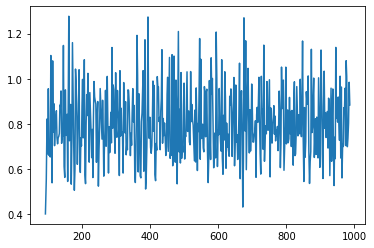

In [395]:
plt.plot(sData['times'][1:], sData['keDiss'][1:] + sData['peDiss'][1:])
plt.show()

In [398]:
import pandas as pd 
sData = pd.DataFrame(summaryData,columns=['times','ke','keDiss','pe','peDiss']) 

sData = sData.sort_values(by=['times'])

(sData['keDiss'][10:].sum() + sData['peDiss'][10:].sum())/(len(sData)-10)

sData = sData.to_numpy()

%store sData

Stored 'sData' (ndarray)


In [2]:
def calcWeights(nx, ny, nz, yBoxScale):
    print ("Calculating work arrays...")
    weightsFxn = lambda k, j, i: 1.0 + np.ceil(j/100000)
    weights = np.fromfunction(np.vectorize(weightsFxn), (int(nz), int(nx/2), int(ny)), dtype=float)

    ksqFxn = lambda k, j, i: j*j + \
                             ((i/yBoxScale) % (nx/2) - np.floor(2*i/(nx*yBoxScale))*nx/2)**2 + \
                             (k % (nz/2) - np.floor(2*k/nz)*nz/2)**2
    ksq = np.fromfunction(np.vectorize(ksqFxn), (int(nz), int(nx/2), int(ny)), dtype=float)

    kxFxn = lambda k, j, i: j
    kx = np.fromfunction(np.vectorize(kxFxn), (int(nz), int(nx/2), int(ny)), dtype=float)

    kyFxn = lambda k, j, i: (i/yBoxScale) % (nx/2) - np.floor(2*i/(nx*yBoxScale))*nx/2
    ky = np.fromfunction(np.vectorize(kyFxn), (int(nz), int(nx/2), int(ny)), dtype=float)

    kzFxn = lambda k, j, i: k % (nz/2) - np.floor(2*k/nz)*nz/2
    kz = np.fromfunction(np.vectorize(kzFxn), (int(nz), int(nx/2), int(ny)), dtype=float)
    
    return weights, ksq, kx, ky, kz

def filterDNS(newDimsXYZ, arr):
    # Note that in array the dimensions are [Z, X/2, Y, 2]
    nzNew2 = int(newDimsXYZ[2]/2)
    nxNew2 = int(newDimsXYZ[0]/2)
    nyNew2 = int(newDimsXYZ[1]/2)
    nzOld = np.shape(arr)[0]
    nxOld = np.shape(arr)[1]
    nyOld = np.shape(arr)[2]
    
    # First slice out in z direction
    posWavenumbers = arr[0:nzNew2+1,:,:,:]
    negWavenumbers = arr[nzOld-nzNew2+1:,:,:,:]
    arr = np.concatenate((posWavenumbers,negWavenumbers),axis=0)

    # Next in y direction
    posWavenumbers = arr[:,:,0:nyNew2+1,:]
    negWavenumbers = arr[:,:,nyOld-nyNew2+1:,:]
    arr = np.concatenate((posWavenumbers,negWavenumbers),axis=2)
    
    # Then in x direction (No negative wavenumbers stored here)
    arr = arr[:,0:nxNew2,:,:]
    
    return arr
    
def spectra(fileList, weights=None, ksq=None, kx=None, ky=None, kz=None, filtDim=None):
    print ("Generating file list...")
    summaryData = []
    totalFiles = min(len(fileList), 20)
    fileCnt = 0
    first = True

    for file in fileList:
        #print (file)
        specData = hdf.File(file,"r")
        u = specData.get('u')[()]
        v = specData.get('v')[()]
        w = specData.get('w')[()]
        r = specData.get('rho')[()]

        if (filtDim is None):
            nx = specData.get('nx')[()]
            ny = specData.get('ny')[()]
            nz = specData.get('nz')[()]
        else:
            nx = filtDim[0]
            ny = filtDim[1]
            nz = filtDim[2]
            # First remove in nz
            u = filterDNS(filtDim, u)
            v = filterDNS(filtDim, v)
            w = filterDNS(filtDim, w)
            r = filterDNS(filtDim, r)
            
        time = specData.get('time')[()]

        yBoxScale = specData.get('LMFy')[()]

        nu = specData.get('nu')[()]
        diff = specData.get('diff')[()]
        grav = specData.get('grav')[()]
        gradv = specData.get('gradv')[()]

        if ((first) & (weights is None)):
            weights, ksq, kx, ky, kz = calcWeights(nx, ny, nz, yBoxScale)

        # Kinetic Energy/Diss Calculations
        eneU = 0.5*(np.multiply(u[:,:,:,0],u[:,:,:,0]) + np.multiply(u[:,:,:,1],u[:,:,:,1]))
        eneV = 0.5*(np.multiply(v[:,:,:,0],v[:,:,:,0]) + np.multiply(v[:,:,:,1],v[:,:,:,1]))
        eneW = 0.5*(np.multiply(w[:,:,:,0],w[:,:,:,0]) + np.multiply(w[:,:,:,1],w[:,:,:,1]))
        
        tmp = eneU + eneV + eneW
        ke = np.multiply(tmp, weights)

        keDiss = np.multiply(ke, ksq)
        keDiss = 2 * nu * keDiss

        # Potential Energy/Diss Calculations
        eneR = 0.5*(np.multiply(r[:,:,:,0],r[:,:,:,0]) + np.multiply(r[:,:,:,1],r[:,:,:,1]))
        
        pe = np.multiply(eneR, weights) 
        pe = -grav / gradv * pe

        peDiss = np.multiply(pe, ksq)
        peDiss = 2 * diff * peDiss

        summaryData.append([time, np.sum(ke), np.sum(keDiss), np.sum(pe), np.sum(peDiss)])

        stratData = pd.DataFrame(np.transpose([kx.flatten(), ky.flatten(), kz.flatten(), weights.flatten(), 
                                  ksq.flatten(), eneU.flatten(), eneV.flatten(), eneW.flatten(), 
                                  eneR.flatten()]), columns=['kx','ky','kz','weight','ksq','eneU','eneV','eneW','eneR'])

        stratData['keSpec'] = (stratData['eneU'] + stratData['eneV'] + stratData['eneW']) * stratData['weight']
        stratData['peSpec'] = -(stratData['eneR'] * grav / gradv) * stratData['weight']
        stratData['keDissSpec'] = (2 * nu * stratData['keSpec']) * stratData['ksq'] 
        stratData['peDissSpec'] = (2 * diff * stratData['peSpec']) * stratData['ksq']
        stratData['kxAbs'] = np.abs(stratData['kx'])
        stratData['kyAbs'] = np.abs(stratData['ky'])
        stratData['kzAbs'] = np.abs(stratData['kz'])

        #print ((stratData.groupby(["kxAbs"]).sum()).iloc[0]['keSpec'])
        
        if (first):
            kxBin = stratData.groupby(["kxAbs"]).sum()
            kyBin = stratData.groupby(["kyAbs"]).sum()
            kzBin = stratData.groupby(["kzAbs"]).sum()
            first = False
        else:
            kxBin = kxBin.add(stratData.groupby(["kxAbs"]).sum())#.reset_index()
            kyBin = kyBin.add(stratData.groupby(["kyAbs"]).sum())#.reset_index()
            kzBin = kzBin.add(stratData.groupby(["kzAbs"]).sum())#.reset_index()

        fileCnt = fileCnt + 1
        if (np.floor((fileCnt/totalFiles)*100) % 25 == 0):
            print ("Done with ", np.floor((fileCnt/totalFiles)*100), "%")
            
        if (fileCnt == 15):
            break

    print ("finishing...")
    summaryData = np.asarray(summaryData, dtype=np.float32)
    
    return (summaryData, kxBin/fileCnt, kyBin/fileCnt, kzBin/fileCnt)

def conjGradCheck(file):
        specData = hdf.File(file,"r")
        u = specData.get('u')[()]
        v = specData.get('v')[()]
        w = specData.get('w')[()]
        r = specData.get('rho')[()]

        for j in range(0,u.shape(1)/2):
            for k in range(0,u.shape(2)/2):
                negJ = u.shape(1) - j
                negK = u.shape(2) - k
                print (j, negJ, k, negK)
                errU = abs(u[0,j,k,0] - u[0,negJ,negK,0]) + abs(u[0,j,k,1] - u[0,negJ,negK,1])
                errV = abs(v[0,j,k,0] - v[0,negJ,negK,0]) + abs(v[0,j,k,1] - v[0,negJ,negK,1])
                errW = abs(w[0,j,k,0] - w[0,negJ,negK,0]) + abs(w[0,j,k,1] - w[0,negJ,negK,1])
                errR = abs(r[0,j,k,0] - r[0,negJ,negK,0]) + abs(r[0,j,k,1] - r[0,negJ,negK,1])

        print (errU, errV, errW, errR)
        
def annotate(spec, plt, titleNote=''):
    plt.frame = False
    #plt.legend(loc="best",fontsize=12,frameon=False)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20, frameon=True)
    if (spec == 'keSpec'):
      title = '1D Kinetic Energy Spectra'
      plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
    elif (spec == 'peSpec'):
      title = '1D Potential Energy Spectra'
      plt.ylabel('E'r'$_{p}$', fontsize=20, fontweight='normal')
    elif (spec == 'peDissSpec'):
      title = '1D PE Dissipation Spectra'
      plt.ylabel('D'r'$_{p}$', fontsize=20, fontweight='normal')
    elif (spec == 'keDissSpec'):
      title = '1D KE Dissipation Spectra'
      plt.ylabel('D'r'$_{k}$', fontsize=20, fontweight='normal')
    if (titleNote != ''):
      title = title + ' - ' + titleNote 
    plt.title(title,fontsize=20)
    plt.xlabel('k', fontsize=20, fontweight='normal')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
        
    return plt

In [7]:
#fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/FIX/N2-128128-Eps084/N2-128128-Eps084restart00568883.h5") 
#fileList1 = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/FIX/N2-128128-Eps084/N2-128128-Eps084restart0057*.h5") 
#fileList2 = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/FIX/N2-128128-Eps084/N2-128128-Eps084restart0067*.h5") 
#fileList3 = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/FIX/N2-128128-Eps084/N2-128128-Eps084restart0077*.h5") 
#fileList4 = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/FIX/N2-128128-Eps084/N2-128128-Eps084restart0087*.h5") 
#fileList5 = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/FIX/N2-128128-Eps084/N2-128128-Eps084restart0097*.h5")

#fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/FIX/N2-12832-Eps084-oldInit/N2-12832-Eps084restart00568883.h5") 
#fileList1 = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N15-512128-Eps084/*.h5") 
#fileList2 = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/FIX/N2-12832-Eps084/*.h5") 
#fileList3 = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/NewTests/N8-25664-Eps084/*.h5") 
#fileList4 = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/FIX/N2-12832-Eps084-oldInit/N2-12832-Eps084restart0087*.h5") 
#fileList5 = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/FIX/N2-12832-Eps084-oldInit/N2-12832-Eps084restart0097*.h5")

#fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N1-12832-Eps084/*.h5") 
#fileList1 = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N15-512512-Eps084/*.h5") 
fileList2 = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/NewTests/N8-256256-Eps084/N8-256256-Eps084restart0150*.h5") 
#fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/iso128-32-128.h5") 
##fileList1 = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/NewTests/N4-12832-Eps084/*.h5") 

#output = spectra(fileList, weights, ksq, kx, ky, kz)
#output1 = spectra(fileList1, weights, ksq, kx, ky, kz)
#output2 = spectra(fileList2, weights, ksq, kx, ky, kz)
#output3 = spectra(fileList3, weights, ksq, kx, ky, kz)
#output4 = spectra(fileList4, weights, ksq, kx, ky, kz)
#output5 = spectra(fileList5, weights, ksq, kx, ky, kz)

#outputR = spectra(fileList, weightsRed, ksqRed, kxRed, kyRed, kzRed)
#outputR1 = spectra(fileList1, weightsRed, ksqRed, kxRed, kyRed, kzRed)
##outputR2 = spectra(fileList2, weightsRed, ksqRed, kxRed, kyRed, kzRed)
##outputR3 = spectra(fileList3, weightsRed, ksqRed, kxRed, kyRed, kzRed)
#outputR4 = spectra(fileList4, weightsRed, ksqRed, kxRed, kyRed, kzRed)
#outputR5 = spectra(fileList5, weightsRed, ksqRed, kxRed, kyRed, kzRed)

#fileList1 = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/FIX/N2-128128-Eps084/N2-128128-Eps084restart010*.h5") 
#fileList2 = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/FIX/N2-12832-Eps084-oldInit/N2-12832-Eps084restart010*.h5") 
#outputCube = spectra(fileList1, weights, ksq, kx, ky, kz)
#outputReduced = spectra(fileList2, weightsRed, ksqRed, kxRed, kyRed, kzRed)

#outputInitRed = spectra(fileList1, weightsRed, ksqRed, kxRed, kyRed, kzRed)

Generating file list...
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N15-512512-Eps084/N15-512512-Eps084restart02675533.h5
Done with  1.25 %
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N15-512512-Eps084/N15-512512-Eps084restart02670533.h5
finishing...


In [5]:
conjGradCheck('/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-128128-Eps084/N2-128128-Eps084restart00595883.h5')

TypeError: 'tuple' object is not callable

In [12]:
file = '/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/FIX/N2-12832-Eps084/N2-12832-Eps084restart00595883.h5'
specData = hdf.File(file,"r")

u = specData.get('u')[()]
v = specData.get('v')[()]
w = specData.get('w')[()]
r = specData.get('rho')[()]
fx = specData.get('fx')[()]
fz = specData.get('fz')[()]

errU = 0.0
errV = 0.0
errW = 0.0
errR = 0.0
for j in range(1,int(np.shape(u)[2]/2)):
   for k in range(1,int(np.shape(u)[0]/2)):
                negJ = np.shape(u)[2] - j
                negK = np.shape(u)[0] - k
                errU += abs(u[k,0,j,0] - u[negK,0,negJ,0]) + abs(u[k,0,j,1] + u[negK,0,negJ,1])
                errV += abs(v[k,0,j,0] - v[negK,0,negJ,0]) + abs(v[k,0,j,1] + v[negK,0,negJ,1])
                errW += abs(w[k,0,j,0] - w[negK,0,negJ,0]) + abs(w[k,0,j,1] + w[negK,0,negJ,1])
                errR += abs(r[k,0,j,0] - r[negK,0,negJ,0]) + abs(r[k,0,j,1] + r[negK,0,negJ,1])

print (errU, errV, errW, errR)

2.523627517503541e-16 2.049647753234251e-16 2.1117665088117757e-16 4.781821271583706e-17


In [22]:
print(fx[2,0,0,0],fx[2,0,0,1])

-0.09825840797025703 0.029849233073206298


In [31]:
print(output[2]['keSpec'].iloc[0:16])# * output[2].index.values)
print(output[2].index.values[0:16])

kyAbs
0.0     0.694054
4.0     1.142676
8.0     0.455587
12.0    0.205154
16.0    0.136493
20.0    0.087198
24.0    0.059446
28.0    0.042305
32.0    0.029607
36.0    0.023138
40.0    0.018439
44.0    0.013655
48.0    0.010685
52.0    0.009073
56.0    0.007765
60.0    0.007420
Name: keSpec, dtype: float64
[ 0.  4.  8. 12. 16. 20. 24. 28. 32. 36. 40. 44. 48. 52. 56. 60.]


In [14]:
specData['u']

<HDF5 dataset "u": shape (128, 64, 32), type "|V16">

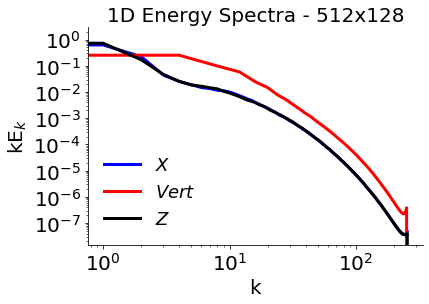

In [9]:
plt.plot(outputR1[1]['keSpec'].iloc[0:512], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(outputR1[2]['keSpec'].iloc[0:128]/4, label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(outputR1[3]['keSpec'].iloc[0:512], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('log')
plt.xscale('log')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('kE'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 512x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlim([0,10])
plt.show()

(array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
        1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 <a list of 12 Text yticklabel objects>)

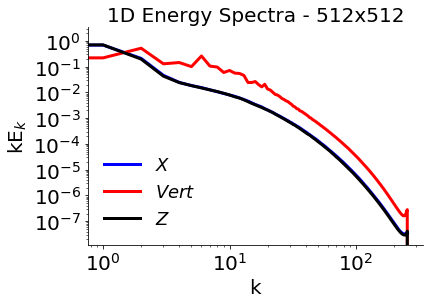

In [21]:
plt.plot(output1[1]['keSpec'].iloc[0:512], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(output1[2]['keSpec'].iloc[0:512], label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(output1[3]['keSpec'].iloc[0:512], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('log')
plt.xscale('log')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('kE'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 512x512',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlim([0,10])

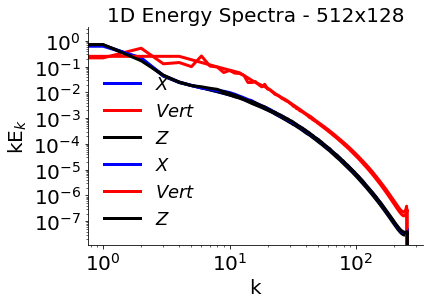

In [18]:
plt.plot(output1[1]['keSpec'].iloc[0:512], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(output1[2]['keSpec'].iloc[0:512], label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(output1[3]['keSpec'].iloc[0:512], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('log')
plt.xscale('log')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('kE'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 512x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlim([0,10])

plt.plot(outputR1[1]['keSpec'].iloc[0:512], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(outputR1[2]['keSpec'].iloc[0:128]/4, label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(outputR1[3]['keSpec'].iloc[0:512], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('log')
plt.xscale('log')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('kE'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 512x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlim([0,10])

plt.show()

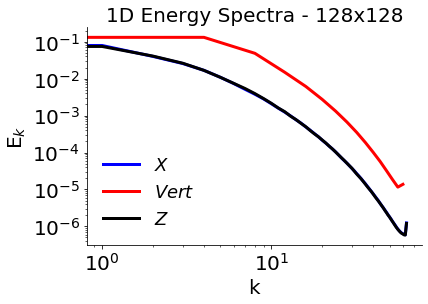

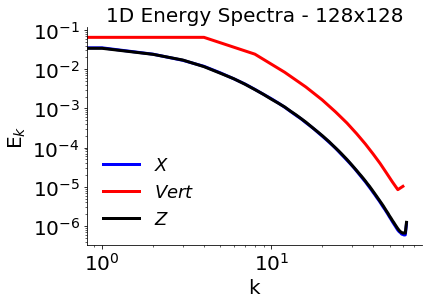

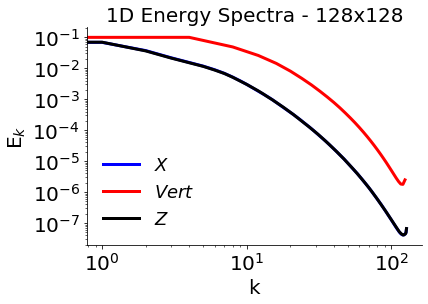

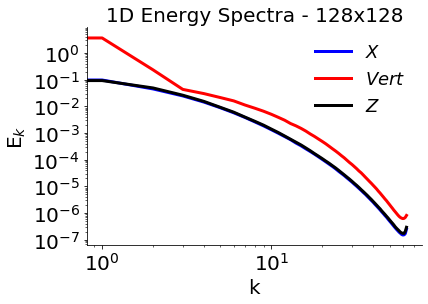

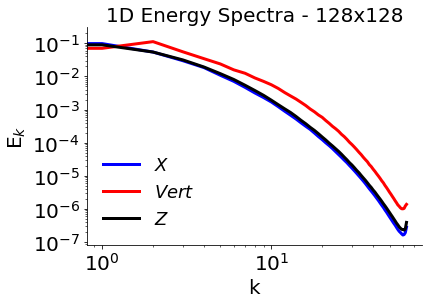

In [51]:
plt.plot(outputR1[1]['peSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(outputR1[2]['peSpec'].iloc[0:16], label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(outputR1[3]['peSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('log')
plt.xscale('log')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

plt.plot(outputR2[1]['peSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(outputR2[2]['peSpec'].iloc[0:16], label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(outputR2[3]['peSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('log')
plt.xscale('log')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

plt.plot(outputR3[1]['peSpec'].iloc[0:128], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(outputR3[2]['peSpec'].iloc[0:32], label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(outputR3[3]['peSpec'].iloc[0:128], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('log')
plt.xscale('log')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

plt.plot(output1[1]['peSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(output1[2]['peSpec'].iloc[0:64], label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(output1[3]['peSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('log')
plt.xscale('log')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

plt.plot(output2[1]['peSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(output2[2]['peSpec'].iloc[0:64], label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(output2[3]['peSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('log')
plt.xscale('log')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

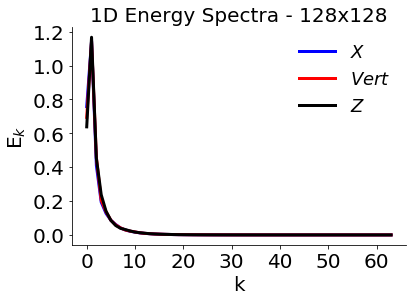

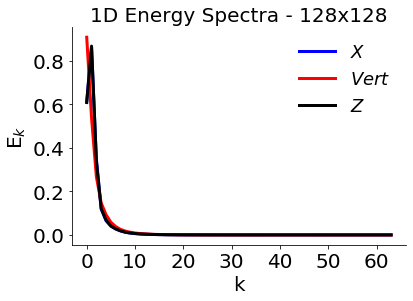

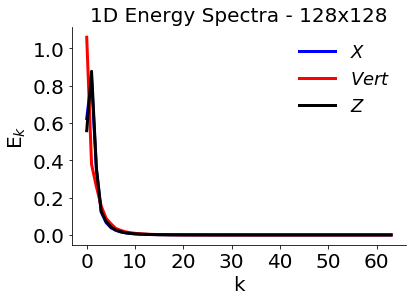

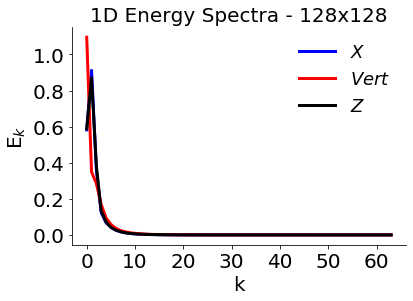

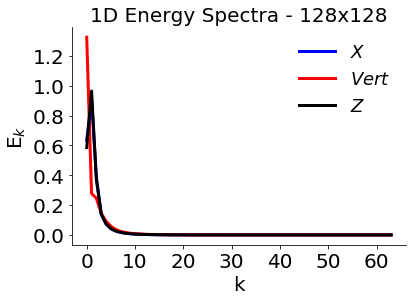

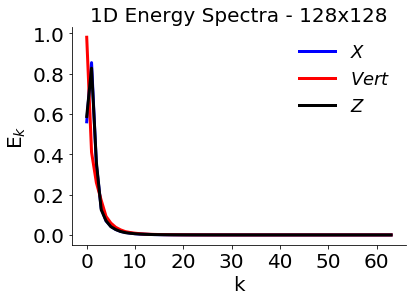

In [54]:
plt.plot(output[1]['keSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(output[2]['keSpec'].iloc[0:64], label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(output[3]['keSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('linear')
plt.xscale('linear')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

plt.plot(output1[1]['keSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(output1[2]['keSpec'].iloc[0:64], label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(output1[3]['keSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('linear')
plt.xscale('linear')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

plt.plot(output2[1]['keSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(output2[2]['keSpec'].iloc[0:64], label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(output2[3]['keSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('linear')
plt.xscale('linear')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

plt.plot(output3[1]['keSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(output3[2]['keSpec'].iloc[0:64], label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(output3[3]['keSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('linear')
plt.xscale('linear')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

plt.plot(output4[1]['keSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(output4[2]['keSpec'].iloc[0:64], label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(output4[3]['keSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('linear')
plt.xscale('linear')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

plt.plot(output5[1]['keSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(output5[2]['keSpec'].iloc[0:64], label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(output5[3]['keSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('linear')
plt.xscale('linear')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

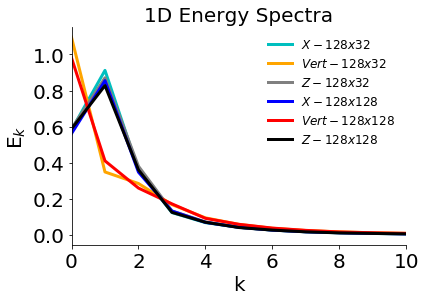

In [60]:
plt.plot(output3[1]['keSpec'].iloc[0:64], label=r'$X - 128x32$', linestyle="solid", linewidth=3, color='c')
plt.plot(output3[2]['keSpec'].iloc[0:64], label=r'$Vert - 128x32$', linestyle="solid", linewidth=3, color='orange')
plt.plot(output3[3]['keSpec'].iloc[0:64], label=r'$Z - 128x32$', linestyle="solid", linewidth=3, color='gray')
plt.plot(output5[1]['keSpec'].iloc[0:64], label=r'$X - 128x128$', linestyle="solid", linewidth=3, color='b')
plt.plot(output5[2]['keSpec'].iloc[0:64], label=r'$Vert - 128x128$', linestyle="solid", linewidth=3, color='r')
plt.plot(output5[3]['keSpec'].iloc[0:64], label=r'$Z - 128x128$', linestyle="solid", linewidth=3, color='k')
plt.yscale('linear')
plt.xscale('linear')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=12,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,10)
plt.show()

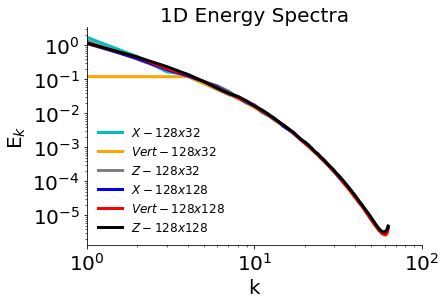

In [70]:
plt.plot(output[1]['keSpec'].iloc[0:64], label=r'$X - 128x32$', linestyle="solid", linewidth=3, color='c')
plt.plot(output[2]['keSpec'].iloc[0:16]/4, label=r'$Vert - 128x32$', linestyle="solid", linewidth=3, color='orange')
plt.plot(output[3]['keSpec'].iloc[0:64], label=r'$Z - 128x32$', linestyle="solid", linewidth=3, color='gray')
plt.plot(output1[1]['keSpec'].iloc[0:64], label=r'$X - 128x128$', linestyle="solid", linewidth=3, color='b')
plt.plot(output1[2]['keSpec'].iloc[0:64], label=r'$Vert - 128x128$', linestyle="solid", linewidth=3, color='r')
plt.plot(output1[3]['keSpec'].iloc[0:64], label=r'$Z - 128x128$', linestyle="solid", linewidth=3, color='k')
plt.yscale('log')
plt.xscale('log')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=12,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(1,100)
plt.show()

In [97]:
fileList = glob.glob("/Users/jmelvin/Desktop/WorkFromHome/stratDNS/N5-512128-Eps084-0413/*.h5") 

output1 = spectra(fileList)

Generating file list...
Calculating work arrays...
('Done with ', 1.25, '%')


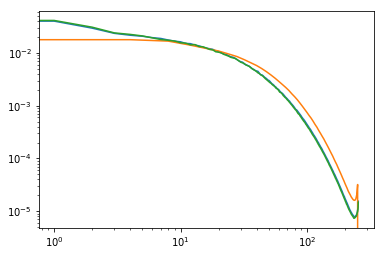

In [113]:
x = np.linspace(1,256,100)
#y = x**(1./3.)
plt.plot(output1[1]['keDissSpec'])
plt.plot(output1[2]['keDissSpec']/4)
plt.plot(output1[3]['keDissSpec'].iloc[:256])
#plt.plot(x,y)
plt.yscale('log')
plt.xscale('log')
plt.show()

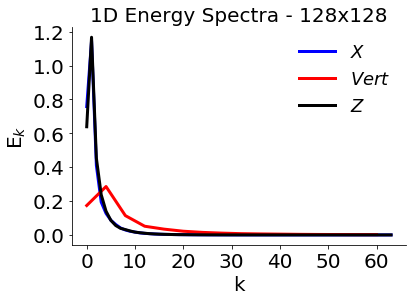

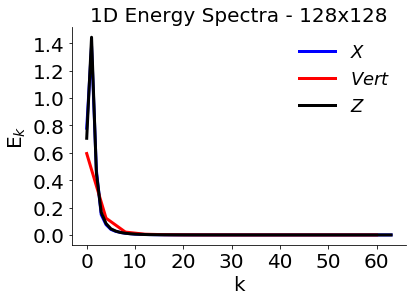

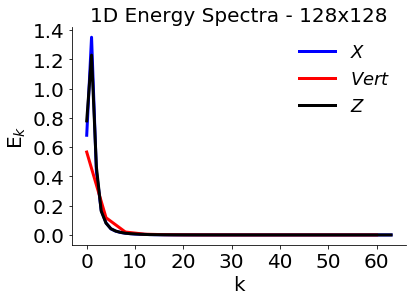

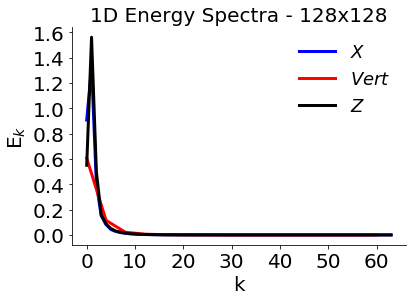

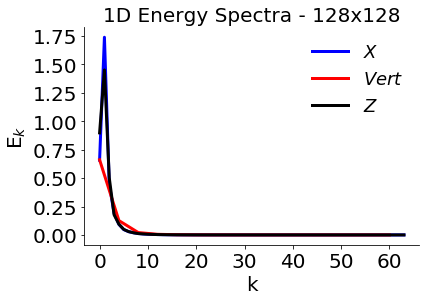

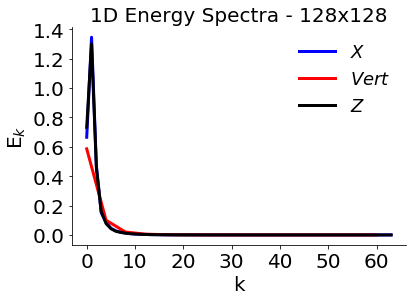

In [64]:
plt.plot(outputR[1]['keSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(outputR[2]['keSpec'].iloc[0:16]/4, label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(outputR[3]['keSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('linear')
plt.xscale('linear')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

plt.plot(outputR1[1]['keSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(outputR1[2]['keSpec'].iloc[0:16]/4, label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(outputR1[3]['keSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('linear')
plt.xscale('linear')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

plt.plot(outputR2[1]['keSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(outputR2[2]['keSpec'].iloc[0:16]/4, label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(outputR2[3]['keSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('linear')
plt.xscale('linear')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

plt.plot(outputR3[1]['keSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(outputR3[2]['keSpec'].iloc[0:16]/4, label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(outputR3[3]['keSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('linear')
plt.xscale('linear')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

plt.plot(outputR4[1]['keSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(outputR4[2]['keSpec'].iloc[0:16]/4, label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(outputR4[3]['keSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('linear')
plt.xscale('linear')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

plt.plot(outputR5[1]['keSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(outputR5[2]['keSpec'].iloc[0:16]/4, label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(outputR5[3]['keSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('linear')
plt.xscale('linear')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

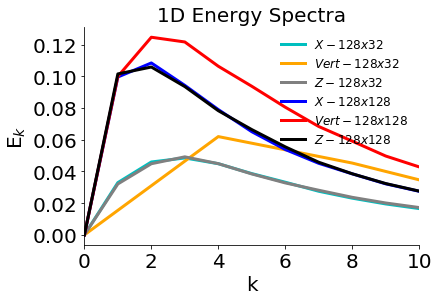

In [78]:
plt.plot(outputReduced[1].index.values[0:64] * outputReduced[1]['peSpec'].iloc[0:64], label=r'$X - 128x32$', linestyle="solid", linewidth=3, color='c')
plt.plot(outputReduced[2].index.values[0:16] * outputReduced[2]['peSpec'].iloc[0:16]/4, label=r'$Vert - 128x32$', linestyle="solid", linewidth=3, color='orange')
plt.plot(outputReduced[3].index.values[0:64] * outputReduced[3]['peSpec'].iloc[0:64], label=r'$Z - 128x32$', linestyle="solid", linewidth=3, color='gray')
plt.plot(outputCube[1].index.values[0:64] * outputCube[1]['peSpec'].iloc[0:64], label=r'$X - 128x128$', linestyle="solid", linewidth=3, color='b')
plt.plot(outputCube[2].index.values[0:64] * outputCube[2]['peSpec'].iloc[0:64], label=r'$Vert - 128x128$', linestyle="solid", linewidth=3, color='r')
plt.plot(outputCube[3].index.values[0:64] * outputCube[3]['peSpec'].iloc[0:64], label=r'$Z - 128x128$', linestyle="solid", linewidth=3, color='k')
plt.yscale('linear')
plt.xscale('linear')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=12,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,10)
plt.show()

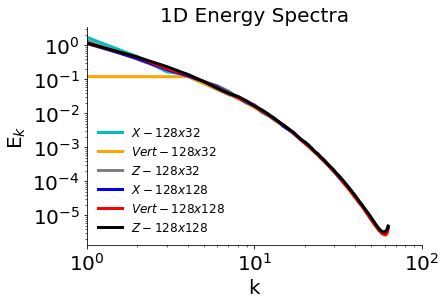

In [86]:
plt.plot(outputInitRed[1]['keSpec'].iloc[0:64], label=r'$X - 128x32$', linestyle="solid", linewidth=3, color='c')
plt.plot(outputInitRed[2]['keSpec'].iloc[0:16]/4, label=r'$Vert - 128x32$', linestyle="solid", linewidth=3, color='orange')
plt.plot(outputInitRed[3]['keSpec'].iloc[0:64], label=r'$Z - 128x32$', linestyle="solid", linewidth=3, color='gray')
plt.plot(output[1]['keSpec'].iloc[0:64], label=r'$X - 128x128$', linestyle="solid", linewidth=3, color='b')
plt.plot(output[2]['keSpec'].iloc[0:64], label=r'$Vert - 128x128$', linestyle="solid", linewidth=3, color='r')
plt.plot(output[3]['keSpec'].iloc[0:64], label=r'$Z - 128x128$', linestyle="solid", linewidth=3, color='k')
plt.yscale('log')
plt.xscale('log')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=12,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('E'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(1,100)
plt.show()

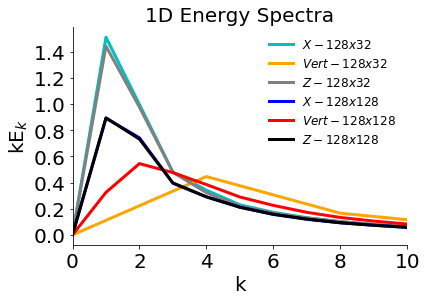

In [92]:
plt.plot(outputReduced[1].index.values[0:64] * outputReduced[1]['keSpec'].iloc[0:64], label=r'$X - 128x32$', linestyle="solid", linewidth=3, color='c')
plt.plot(outputReduced[2].index.values[0:16] * outputReduced[2]['keSpec'].iloc[0:16]/4, label=r'$Vert - 128x32$', linestyle="solid", linewidth=3, color='orange')
plt.plot(outputReduced[3].index.values[0:64] * outputReduced[3]['keSpec'].iloc[0:64], label=r'$Z - 128x32$', linestyle="solid", linewidth=3, color='gray')
plt.plot(outputCube[1].index.values[0:64] * outputCube[1]['keSpec'].iloc[0:64], label=r'$X - 128x128$', linestyle="solid", linewidth=3, color='b')
plt.plot(outputCube[2].index.values[0:64] * outputCube[2]['keSpec'].iloc[0:64], label=r'$Vert - 128x128$', linestyle="solid", linewidth=3, color='r')
plt.plot(outputCube[3].index.values[0:64] * outputCube[3]['keSpec'].iloc[0:64], label=r'$Z - 128x128$', linestyle="solid", linewidth=3, color='k')
plt.yscale('linear')
plt.xscale('linear')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=12,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('kE'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D Energy Spectra',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,10)
plt.show()

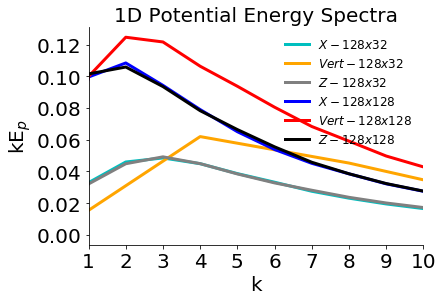

In [91]:
plt.plot(outputReduced[1].index.values[0:64] * outputReduced[1]['peSpec'].iloc[0:64], label=r'$X - 128x32$', linestyle="solid", linewidth=3, color='c')
plt.plot(outputReduced[2].index.values[0:16] * outputReduced[2]['peSpec'].iloc[0:16]/4, label=r'$Vert - 128x32$', linestyle="solid", linewidth=3, color='orange')
plt.plot(outputReduced[3].index.values[0:64] * outputReduced[3]['peSpec'].iloc[0:64], label=r'$Z - 128x32$', linestyle="solid", linewidth=3, color='gray')
plt.plot(outputCube[1].index.values[0:64] * outputCube[1]['peSpec'].iloc[0:64], label=r'$X - 128x128$', linestyle="solid", linewidth=3, color='b')
plt.plot(outputCube[2].index.values[0:64] * outputCube[2]['peSpec'].iloc[0:64], label=r'$Vert - 128x128$', linestyle="solid", linewidth=3, color='r')
plt.plot(outputCube[3].index.values[0:64] * outputCube[3]['peSpec'].iloc[0:64], label=r'$Z - 128x128$', linestyle="solid", linewidth=3, color='k')
plt.yscale('linear')
plt.xscale('linear')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=12,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('kE'r'$_{p}$', fontsize=20, fontweight='normal')
plt.title('1D Potential Energy Spectra',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(1,10)
plt.show()

In [14]:
import pickle
pickle.dump( outputR1, open( "TwoFiles512128spec.dat", "wb" ) )
pickle.dump( output1,  open( "TwoFiles512512spec.dat", "wb" ) )

In [26]:
base = '/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/'
simName = 'N4-128128-Eps084'
simNameRed = 'N4-12832-Eps084'

fileList0 = glob.glob(base + simName + "/rst950883/" + simName + "*.h5") 
fileList1 = glob.glob(base + simName + "/rst1100883/" + simName + "*.h5") 
fileList2 = glob.glob(base + simName + "/rst1400883/" + simName + "*.h5") 
fileList3 = glob.glob(base + simName + "/rst1700883/" + simName + "*.h5") 
fileListRed = glob.glob(base + simNameRed + "/" + simNameRed + "*009*.h5") 

In [27]:
output0 = spectra(fileList0, weights, ksq, kx, ky, kz)
output1 = spectra(fileList1, weights, ksq, kx, ky, kz)
output2 = spectra(fileList2, weights, ksq, kx, ky, kz)
output3 = spectra(fileList3, weights, ksq, kx, ky, kz)
outputRed = spectra(fileListRed, weightsRed, ksqRed, kxRed, kyRed, kzRed)

Generating file list...
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-128128-Eps084/rst950883/N4-128128-Eps084restart00963883.h5
Done with  1.25 %
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-128128-Eps084/rst950883/N4-128128-Eps084restart00961883.h5
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-128128-Eps084/rst950883/N4-128128-Eps084restart00965883.h5
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-128128-Eps084/rst950883/N4-128128-Eps084restart00958883.h5
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-128128-Eps084/rst950883/N4-128128-Eps084restart00967883.h5
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-128128-Eps084/rst950883/N4-128128-Eps084restart00960883.h5
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-128128-Eps084/rst950883/N4-128128-Eps084restart00962883.h5
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-1

finishing...
Generating file list...
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-128128-Eps084/rst1700883/N4-128128-Eps084restart01709883.h5
Done with  1.25 %
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-128128-Eps084/rst1700883/N4-128128-Eps084restart01710883.h5
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-128128-Eps084/rst1700883/N4-128128-Eps084restart01712883.h5
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-128128-Eps084/rst1700883/N4-128128-Eps084restart01716883.h5
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-128128-Eps084/rst1700883/N4-128128-Eps084restart01714883.h5
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-128128-Eps084/rst1700883/N4-128128-Eps084restart01713883.h5
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-128128-Eps084/rst1700883/N4-128128-Eps084restart01708883.h5
/Users/blmindell/Desktop/Jeremy/WorkFromHome/stra

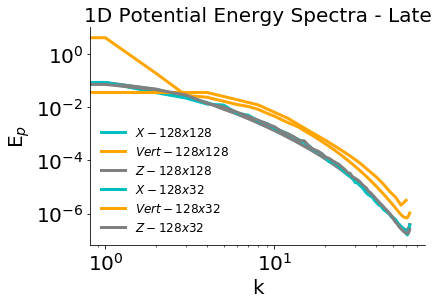

In [58]:
spec = 'peSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'
plt.plot(output[1][spec].iloc[0:64], label=r'$X - 128x128$', linestyle="solid", linewidth=3, color='c')
plt.plot(output[2][spec].iloc[0:64], label=r'$Vert - 128x128$', linestyle="solid", linewidth=3, color='orange')
plt.plot(output[3][spec].iloc[0:64], label=r'$Z - 128x128$', linestyle="solid", linewidth=3, color='gray')
plt.plot(outputRed[1][spec].iloc[0:64], label=r'$X - 128x32$', linestyle="solid", linewidth=3, color='c')
plt.plot(outputRed[2][spec].iloc[0:16]/4, label=r'$Vert - 128x32$', linestyle="solid", linewidth=3, color='orange')
plt.plot(outputRed[3][spec].iloc[0:64], label=r'$Z - 128x32$', linestyle="solid", linewidth=3, color='gray')
plt.yscale('log')
plt.xscale('log')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt, titleNote = 'Late') 
#plt.xlim(0,20)
plt.show()

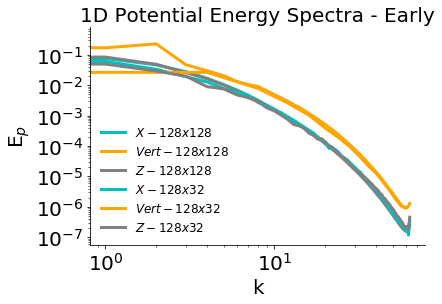

In [57]:
spec = 'peSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'
plt.plot(output1[1][spec].iloc[0:64], label=r'$X - 128x128$', linestyle="solid", linewidth=3, color='c')
plt.plot(output1[2][spec].iloc[0:64], label=r'$Vert - 128x128$', linestyle="solid", linewidth=3, color='orange')
plt.plot(output1[3][spec].iloc[0:64], label=r'$Z - 128x128$', linestyle="solid", linewidth=3, color='gray')
plt.plot(outputRed1[1][spec].iloc[0:64], label=r'$X - 128x32$', linestyle="solid", linewidth=3, color='c')
plt.plot(outputRed1[2][spec].iloc[0:16]/4, label=r'$Vert - 128x32$', linestyle="solid", linewidth=3, color='orange')
plt.plot(outputRed1[3][spec].iloc[0:64], label=r'$Z - 128x32$', linestyle="solid", linewidth=3, color='gray')
plt.yscale('log')
plt.xscale('log')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt, titleNote = 'Early') 
#plt.xlim(0,20)
plt.show()

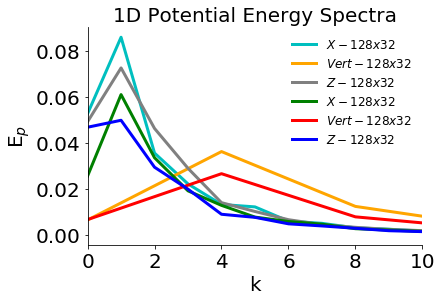

In [59]:
spec = 'peSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'
plt.plot(outputRed[1][spec].iloc[0:64], label=r'$X - 128x32$', linestyle="solid", linewidth=3, color='c')
plt.plot(outputRed[2][spec].iloc[0:16]/4, label=r'$Vert - 128x32$', linestyle="solid", linewidth=3, color='orange')
plt.plot(outputRed[3][spec].iloc[0:64], label=r'$Z - 128x32$', linestyle="solid", linewidth=3, color='gray')
plt.plot(outputRed1[1][spec].iloc[0:64], label=r'$X - 128x32$', linestyle="solid", linewidth=3, color='green')
plt.plot(outputRed1[2][spec].iloc[0:16]/4, label=r'$Vert - 128x32$', linestyle="solid", linewidth=3, color='red')
plt.plot(outputRed1[3][spec].iloc[0:64], label=r'$Z - 128x32$', linestyle="solid", linewidth=3, color='blue')
plt.yscale('linear')
plt.xscale('linear')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt)
plt.xlim(0,10)
plt.show()

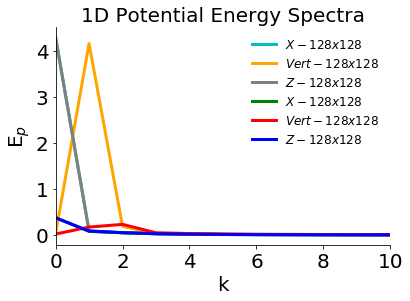

In [60]:
spec = 'peSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'
plt.plot(output[1][spec].iloc[0:64], label=r'$X - 128x128$', linestyle="solid", linewidth=3, color='c')
plt.plot(output[2][spec].iloc[0:64], label=r'$Vert - 128x128$', linestyle="solid", linewidth=3, color='orange')
plt.plot(output[3][spec].iloc[0:64], label=r'$Z - 128x128$', linestyle="solid", linewidth=3, color='gray')
plt.plot(output1[1][spec].iloc[0:64], label=r'$X - 128x128$', linestyle="solid", linewidth=3, color='green')
plt.plot(output1[2][spec].iloc[0:64], label=r'$Vert - 128x128$', linestyle="solid", linewidth=3, color='red')
plt.plot(output1[3][spec].iloc[0:64], label=r'$Z - 128x128$', linestyle="solid", linewidth=3, color='blue')
plt.yscale('linear')
plt.xscale('linear')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt)
plt.xlim(0,10)
plt.show()

In [ ]:
def spectra(file)
    spectralData = hdf.File(file,"r")
    
    # z, x, y
    u = specData.get('u')[()]  
    v = specData.get('v')[()]
    w = specData.get('w')[()]
    r = specData.get('rho')[()]

    nx = specData.get('nx')[()]
    ny = specData.get('ny')[()]
    nz = specData.get('nz')[()]

    time = specData.get('time')[()]

    yBoxScale = specData.get('LMFy')[()]

    nu = specData.get('nu')[()]
    diff = specData.get('diff')[()]
    grav = specData.get('grav')[()]
    gradv = specData.get('gradv')[()]

    # Filter out vertical modes
    maxNy = 1
    r[:,:,maxNy:ny,0] = 0.0
    
    eneU = 0.5*(np.multiply(u[:,:,:,0],u[:,:,:,0]) + np.multiply(u[:,:,:,1],u[:,:,:,1]))
    eneV = 0.5*(np.multiply(v[:,:,:,0],v[:,:,:,0]) + np.multiply(v[:,:,:,1],v[:,:,:,1]))
    eneW = 0.5*(np.multiply(w[:,:,:,0],w[:,:,:,0]) + np.multiply(w[:,:,:,1],w[:,:,:,1]))

    tmp = eneU + eneV + eneW
    ke = np.multiply(tmp, weights)

    keDiss = np.multiply(ke, ksq)
    keDiss = 2 * nu * keDiss

    # Potential Energy/Diss Calculations
    eneR = 0.5*(np.multiply(r[:,:,:,0],r[:,:,:,0]) + np.multiply(r[:,:,:,1],r[:,:,:,1]))

    pe = np.multiply(eneR, weights) 
    pe = -grav / gradv * pe

    peDiss = np.multiply(pe, ksq)
    peDiss = 2 * diff * peDiss

    summaryData.append([time, np.sum(ke), np.sum(keDiss), np.sum(pe), np.sum(peDiss)])

    stratData = pd.DataFrame(np.transpose([kx.flatten(), ky.flatten(), kz.flatten(), weights.flatten(), 
                              ksq.flatten(), eneU.flatten(), eneV.flatten(), eneW.flatten(), 
                              eneR.flatten()]), columns=['kx','ky','kz','weight','ksq','eneU','eneV','eneW','eneR'])

    stratData['keSpec'] = (stratData['eneU'] + stratData['eneV'] + stratData['eneW']) * stratData['weight']
    stratData['peSpec'] = -(stratData['eneR'] * grav / gradv) * stratData['weight']
    stratData['keDissSpec'] = (2 * nu * stratData['keSpec']) * stratData['ksq'] 
    stratData['peDissSpec'] = (2 * diff * stratData['peSpec']) * stratData['ksq']
    stratData['kxAbs'] = np.abs(stratData['kx'])
    stratData['kyAbs'] = np.abs(stratData['ky'])
    stratData['kzAbs'] = np.abs(stratData['kz'])

    #print ((stratData.groupby(["kxAbs"]).sum()).iloc[0]['keSpec'])

    if (first):
        kxBin = stratData.groupby(["kxAbs"]).sum()
        kyBin = stratData.groupby(["kyAbs"]).sum()
        kzBin = stratData.groupby(["kzAbs"]).sum()
        first = False
    else:
        kxBin = kxBin.add(stratData.groupby(["kxAbs"]).sum())#.reset_index()
        kyBin = kyBin.add(stratData.groupby(["kyAbs"]).sum())#.reset_index()
        kzBin = kzBin.add(stratData.groupby(["kzAbs"]).sum())#.reset_index()

    fileCnt = fileCnt + 1
    if (fileCnt % 8 == 1):
        print ("Done with ", fileCnt/0.8, "%")

    if (fileCnt == 80):
        break

print ("finishing...")
summaryData = np.asarray(summaryData, dtype=np.float32)

return (summaryData, kxBin/fileCnt, kyBin/fileCnt, kzBin/fileCnt)

In [41]:
def read_wavespace_data(hfile, field):
    v = hfile[field][()]
    nz,nx,n,_ = v.shape
    f = np.zeros((nz,nx+1,n), dtype=complex)
    f[:,:nx,:].real = v[:,:,:,0]
    f[:,:nx,:].imag = v[:,:,:,1]
    return f

def filter_vert_modes(field, minKv, maxKv):
    field[:,:,maxKv:] = 0.0
    field[:,:,:minKv] = 0.0
    return field

def convert_to_real(field):
    (nz,nx,n) = field.shape
    real = np.fft.irfft(np.fft.ifft(np.fft.ifft(field, axis=0), axis=2), axis=1)*(nx-1)*n*nz
    return real

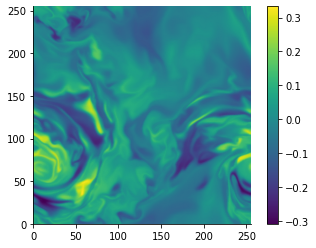

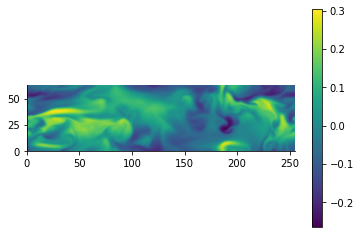

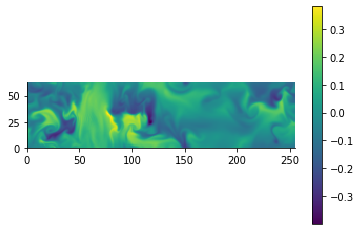

In [266]:
test = hdf.File('/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-25664-Eps084/N4-25664-Eps084restart01116786.h5',"r")

var = 'rho'
index = 13

vWave = read_wavespace_data(test, var)
#vFilt = filter_vert_modes(vWave, 1, 4)
#vReal = convert_to_real(vFilt)
vReal = convert_to_real(vWave)

vertSlice = vReal[:,:,index] #vReal[:,:,index]
h2Slice = vReal[:,index,:]
h1Slice = vReal[index,:,:]

x = np.linspace(0, np.shape(vertSlice)[1]-1, np.shape(vertSlice)[1])
y = np.linspace(0, np.shape(vertSlice)[0]-1, np.shape(vertSlice)[0])
XX, YY = np.meshgrid(x, y)
fig, ax = plt.subplots()
img = ax.pcolormesh(XX, YY, vertSlice, shading='gouraud')
ax.set_aspect('equal')
fig.colorbar(img)
plt.show()

x = np.linspace(0, np.shape(h1Slice)[1]-1, np.shape(h1Slice)[1])
y = np.linspace(0, np.shape(h1Slice)[0]-1, np.shape(h1Slice)[0])
XX, YY = np.meshgrid(y, x)
fig, ax = plt.subplots()
img = ax.pcolormesh(XX, YY, np.transpose(h1Slice), shading='gouraud')
ax.set_aspect('equal')
fig.colorbar(img)
plt.show()

x = np.linspace(0, np.shape(h2Slice)[1]-1, np.shape(h2Slice)[1])
y = np.linspace(0, np.shape(h2Slice)[0]-1, np.shape(h2Slice)[0])
XX, YY = np.meshgrid(y, x)
fig, ax = plt.subplots()
img = ax.pcolormesh(XX, YY, np.transpose(h2Slice), shading='gouraud')
ax.set_aspect('equal')
fig.colorbar(img)
plt.show()

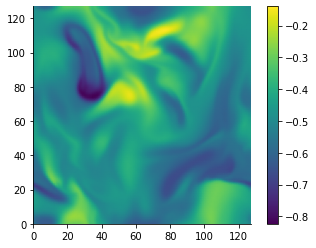

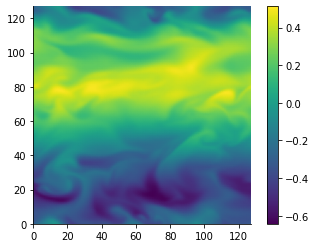

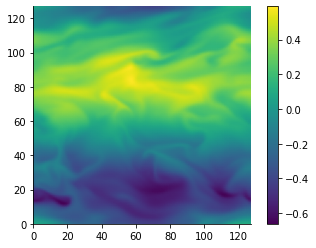

In [271]:
test = hdf.File('/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-128128-Eps084/N4-128128-Eps084restart01450883.h5',"r")

var = 'rho'
index = 13

vWave = read_wavespace_data(test, var)
#vFilt = filter_vert_modes(vWave, 1, 4)
#vReal = convert_to_real(vFilt)
vReal = convert_to_real(vWave)

vertSlice = vReal[:,:,index] #vReal[:,:,index]
h2Slice = vReal[:,index,:]
h1Slice = vReal[index,:,:]

x = np.linspace(0, np.shape(vertSlice)[1]-1, np.shape(vertSlice)[1])
y = np.linspace(0, np.shape(vertSlice)[0]-1, np.shape(vertSlice)[0])
XX, YY = np.meshgrid(x, y)
fig, ax = plt.subplots()
img = ax.pcolormesh(XX, YY, vertSlice, shading='gouraud')
ax.set_aspect('equal')
fig.colorbar(img)
plt.show()

x = np.linspace(0, np.shape(h1Slice)[1]-1, np.shape(h1Slice)[1])
y = np.linspace(0, np.shape(h1Slice)[0]-1, np.shape(h1Slice)[0])
XX, YY = np.meshgrid(y, x)
fig, ax = plt.subplots()
img = ax.pcolormesh(XX, YY, np.transpose(h1Slice), shading='gouraud')
ax.set_aspect('equal')
fig.colorbar(img)
plt.show()

x = np.linspace(0, np.shape(h2Slice)[1]-1, np.shape(h2Slice)[1])
y = np.linspace(0, np.shape(h2Slice)[0]-1, np.shape(h2Slice)[0])
XX, YY = np.meshgrid(y, x)
fig, ax = plt.subplots()
img = ax.pcolormesh(XX, YY, np.transpose(h2Slice), shading='gouraud')
ax.set_aspect('equal')
fig.colorbar(img)
plt.show()

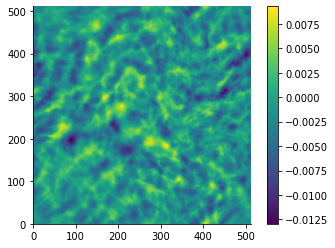

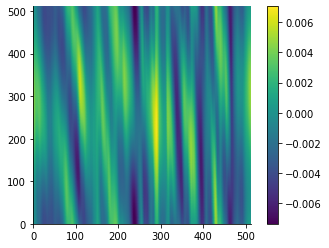

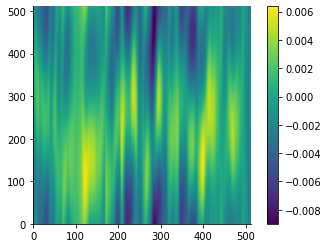

In [68]:
test = hdf.File('/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N15-512512-Eps084/N15-512512-Eps084restart02784948.h5',"r")

var = 'rho'
index = 25

vWave = read_wavespace_data(test, var)
vFilt = filter_vert_modes(vWave, 0, 2)
#vReal = convert_to_real(vWave)
vReal = convert_to_real(vFilt)

vertSlice = vReal[:,:,index] #vReal[:,:,index]
h2Slice = vReal[:,index,:]
h1Slice = vReal[index,:,:]

x = np.linspace(0, np.shape(vertSlice)[1]-1, np.shape(vertSlice)[1])
y = np.linspace(0, np.shape(vertSlice)[0]-1, np.shape(vertSlice)[0])
XX, YY = np.meshgrid(x, y)
fig, ax = plt.subplots()
img = ax.pcolormesh(XX, YY, vertSlice, shading='gouraud')
ax.set_aspect('equal')
fig.colorbar(img)
plt.show()

x = np.linspace(0, np.shape(h1Slice)[1]-1, np.shape(h1Slice)[1])
y = np.linspace(0, np.shape(h1Slice)[0]-1, np.shape(h1Slice)[0])
XX, YY = np.meshgrid(y, x)
fig, ax = plt.subplots()
img = ax.pcolormesh(XX, YY, np.transpose(h1Slice), shading='gouraud')
ax.set_aspect('equal')
fig.colorbar(img)
plt.show()

x = np.linspace(0, np.shape(h2Slice)[1]-1, np.shape(h2Slice)[1])
y = np.linspace(0, np.shape(h2Slice)[0]-1, np.shape(h2Slice)[0])
XX, YY = np.meshgrid(y, x)
fig, ax = plt.subplots()
img = ax.pcolormesh(XX, YY, np.transpose(h2Slice), shading='gouraud')
ax.set_aspect('equal')
fig.colorbar(img)
plt.show()

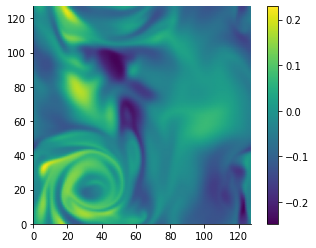

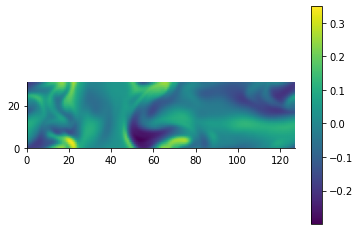

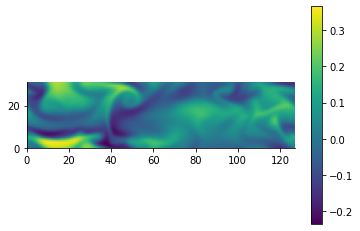

In [71]:
test = hdf.File('/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalTests/N4-12832-Eps084/N4-12832-Eps084restart00998883.h5',"r")

var = 'rho'
index = 21

vWave = read_wavespace_data(test, var)
#vFilt = filter_vert_modes(vWave, 0, 5)
#vReal = convert_to_real(vFilt)
vReal = convert_to_real(vWave)

vertSlice = vReal[:,:,index] #vReal[:,:,index]
h2Slice = vReal[:,index,:]
h1Slice = vReal[index,:,:]

x = np.linspace(0, np.shape(vertSlice)[1]-1, np.shape(vertSlice)[1])
y = np.linspace(0, np.shape(vertSlice)[0]-1, np.shape(vertSlice)[0])
XX, YY = np.meshgrid(x, y)
fig, ax = plt.subplots()
img = ax.pcolormesh(XX, YY, vertSlice, shading='gouraud')
ax.set_aspect('equal')
fig.colorbar(img)
plt.show()

x = np.linspace(0, np.shape(h1Slice)[1]-1, np.shape(h1Slice)[1])
y = np.linspace(0, np.shape(h1Slice)[0]-1, np.shape(h1Slice)[0])
XX, YY = np.meshgrid(y, x)
fig, ax = plt.subplots()
img = ax.pcolormesh(XX, YY, np.transpose(h1Slice), shading='gouraud')
ax.set_aspect('equal')
#ax.set_ylim([0, 64])
fig.colorbar(img)
plt.show()

x = np.linspace(0, np.shape(h2Slice)[1]-1, np.shape(h2Slice)[1])
y = np.linspace(0, np.shape(h2Slice)[0]-1, np.shape(h2Slice)[0])
XX, YY = np.meshgrid(y, x)
fig, ax = plt.subplots()
img = ax.pcolormesh(XX, YY, np.transpose(h2Slice), shading='gouraud')
ax.set_aspect('equal')
#ax.set_ylim([0, 64])
fig.colorbar(img)
plt.show()

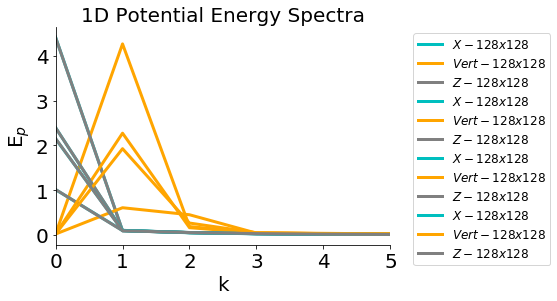

In [82]:
spec = 'peSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'
plt.plot(output0[1][spec].iloc[0:64], label=r'$X - 128x128$', linestyle="solid", linewidth=3, color='c')
plt.plot(output0[2][spec].iloc[0:64], label=r'$Vert - 128x128$', linestyle="solid", linewidth=3, color='orange')
plt.plot(output0[3][spec].iloc[0:64], label=r'$Z - 128x128$', linestyle="solid", linewidth=3, color='gray')
plt.plot(output1[1][spec].iloc[0:64], label=r'$X - 128x128$', linestyle="solid", linewidth=3, color='c')
plt.plot(output1[2][spec].iloc[0:64], label=r'$Vert - 128x128$', linestyle="solid", linewidth=3, color='orange')
plt.plot(output1[3][spec].iloc[0:64], label=r'$Z - 128x128$', linestyle="solid", linewidth=3, color='gray')
plt.plot(output2[1][spec].iloc[0:64], label=r'$X - 128x128$', linestyle="solid", linewidth=3, color='c')
plt.plot(output2[2][spec].iloc[0:64], label=r'$Vert - 128x128$', linestyle="solid", linewidth=3, color='orange')
plt.plot(output2[3][spec].iloc[0:64], label=r'$Z - 128x128$', linestyle="solid", linewidth=3, color='gray')
plt.plot(output3[1][spec].iloc[0:64], label=r'$X - 128x128$', linestyle="solid", linewidth=3, color='c')
plt.plot(output3[2][spec].iloc[0:64], label=r'$Vert - 128x128$', linestyle="solid", linewidth=3, color='orange')
plt.plot(output3[3][spec].iloc[0:64], label=r'$Z - 128x128$', linestyle="solid", linewidth=3, color='gray')
#plt.plot(outputRed[1][spec].iloc[0:64], label=r'$X - 128x32$', linestyle="solid", linewidth=3, color='blue')
#plt.plot(outputRed[2][spec].iloc[0:16]/4.0, label=r'$Vert - 128x32$', linestyle="solid", linewidth=3, color='red')
#plt.plot(outputRed[3][spec].iloc[0:64], label=r'$Z - 128x32$', linestyle="solid", linewidth=3, color='black')
plt.yscale('linear')
plt.xscale('linear')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt)
plt.xlim(0,5)
plt.show()

In [135]:
folder = '/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/LES/STAMD/STAMD-N15-512128-6432-Eps084'
fileList = glob.glob(folder + "/*030*.h5") 
outputSTAMD = spectra(fileList)

folder = '/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/LES/EXPMQM/EXPMQM-N15-512128-6432-Eps084'
fileList = glob.glob(folder + "/*026*.h5") 
outputEXPMQM = spectra(fileList)

Generating file list...
(64, 32, 32, 2)
Calculating work arrays...
(64, 32, 32)
(64, 32, 32)
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
Done with  25.0 %
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
Done with  50.0 %
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
Done with  75.0 %
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
(64, 32, 32, 2)
(64, 32, 32)
(64, 32, 32)
Done with  100.0 %
finishing...
Generating file list...

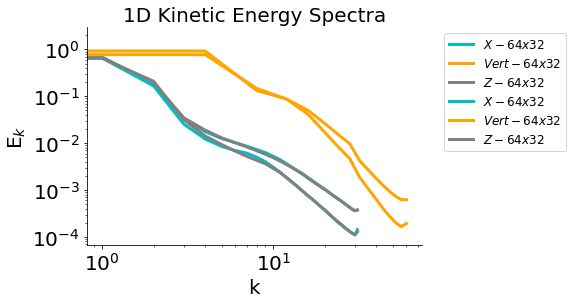

In [136]:
spec = 'keSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'
plt.plot(outputSTAMD[1][spec].iloc[0:32], label=r'$X - 64x32$', linestyle="solid", linewidth=3, color='c')
plt.plot(outputSTAMD[2][spec].iloc[0:16], label=r'$Vert - 64x32$', linestyle="solid", linewidth=3, color='orange')
plt.plot(outputSTAMD[3][spec].iloc[0:32], label=r'$Z - 64x32$', linestyle="solid", linewidth=3, color='gray')
plt.plot(outputEXPMQM[1][spec].iloc[0:32], label=r'$X - 64x32$', linestyle="solid", linewidth=3, color='c')
plt.plot(outputEXPMQM[2][spec].iloc[0:16], label=r'$Vert - 64x32$', linestyle="solid", linewidth=3, color='orange')
plt.plot(outputEXPMQM[3][spec].iloc[0:32], label=r'$Z - 64x32$', linestyle="solid", linewidth=3, color='gray')
plt.yscale('log')
plt.xscale('log')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt)
#plt.xlim(0,5)
plt.show()

In [33]:
folder = '/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalRuns/N15-512128-Eps084'
wts512128, ksq512128, kx512128, ky512128, kz512128 = calcWeights(512, 128, 512, 0.25)

fileList = glob.glob(folder + "/*.h5") 
outputDNS = spectra(fileList, wts512128, ksq512128, kx512128, ky512128, kz512128)

Calculating work arrays...
Generating file list...
Done with  100.0 %
finishing...


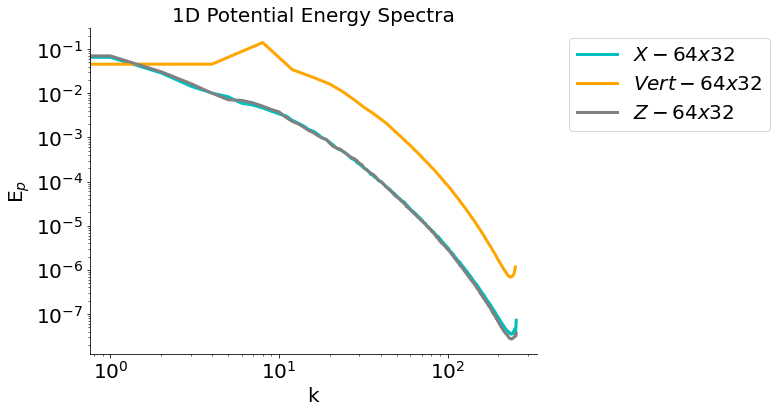

In [252]:
spec = 'peSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'
plt.plot(outputDNS[1][spec].iloc[0:256], label=r'$X - 64x32$', linestyle="solid", linewidth=3, color='c')
plt.plot(outputDNS[2][spec].iloc[0:64], label=r'$Vert - 64x32$', linestyle="solid", linewidth=3, color='orange')
plt.plot(outputDNS[3][spec].iloc[0:256], label=r'$Z - 64x32$', linestyle="solid", linewidth=3, color='gray')
plt.yscale('log')
plt.xscale('log')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt)
#plt.xlim(0,5)
plt.show()

In [78]:
folder = '/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/finalRuns/N15-512128-Eps084'
fileList = glob.glob(folder + "/*.h5") 
outputFiltDNS = spectra(fileList, filtDim=[64,32,64])

Generating file list...
(64, 256, 17, 2)
(64, 256, 15, 2)
(64, 256, 17, 2)
(64, 256, 15, 2)
(64, 256, 17, 2)
(64, 256, 15, 2)
(64, 256, 17, 2)
(64, 256, 15, 2)
(64, 32, 32, 2)
Calculating work arrays...
(64, 32, 32)
(64, 32, 32)
Done with  100.0 %
finishing...


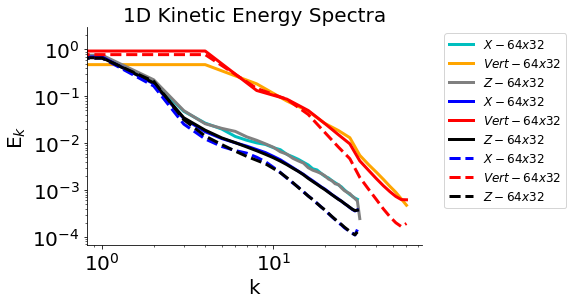

In [86]:
spec = 'keSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'
plt.plot(outputFiltDNS[1][spec].iloc[0:64], label=r'$X - 64x32$', linestyle="solid", linewidth=3, color='c')
plt.plot(outputFiltDNS[2][spec].iloc[0:16], label=r'$Vert - 64x32$', linestyle="solid", linewidth=3, color='orange')
plt.plot(outputFiltDNS[3][spec].iloc[0:64], label=r'$Z - 64x32$', linestyle="solid", linewidth=3, color='gray')
plt.plot(outputSTAMD[1][spec].iloc[0:32], label=r'$X - 64x32$', linestyle="solid", linewidth=3, color='b')
plt.plot(outputSTAMD[2][spec].iloc[0:16], label=r'$Vert - 64x32$', linestyle="solid", linewidth=3, color='red')
plt.plot(outputSTAMD[3][spec].iloc[0:32], label=r'$Z - 64x32$', linestyle="solid", linewidth=3, color='black')
plt.plot(outputEXPMQM[1][spec].iloc[0:32], label=r'$X - 64x32$', linestyle="dashed", linewidth=3, color='b')
plt.plot(outputEXPMQM[2][spec].iloc[0:16], label=r'$Vert - 64x32$', linestyle="dashed", linewidth=3, color='red')
plt.plot(outputEXPMQM[3][spec].iloc[0:32], label=r'$Z - 64x32$', linestyle="dashed", linewidth=3, color='black')
plt.yscale('log')
plt.xscale('log')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt)
#plt.xlim(0,5)
plt.show()

In [166]:
folder = '/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/LES/EXPMQM/EXPMQM-N15-512128-6432-Eps084'
fileList = glob.glob(folder + "/*.h5")

In [167]:
tmp = pd.DataFrame(fileList, columns=['fileName'])
tmp['step'] = tmp['fileName'].str[-11:-3].astype(int)

In [168]:
tmp.sort_values(by=['step'], ascending=False)

,fileName,step
1,/Users/blmindell/Desktop/Jeremy/WorkFromHome/s...,2679533
14,/Users/blmindell/Desktop/Jeremy/WorkFromHome/s...,2674533
12,/Users/blmindell/Desktop/Jeremy/WorkFromHome/s...,2669533
3,/Users/blmindell/Desktop/Jeremy/WorkFromHome/s...,2664533
2,/Users/blmindell/Desktop/Jeremy/WorkFromHome/s...,2659533
11,/Users/blmindell/Desktop/Jeremy/WorkFromHome/s...,2654533
13,/Users/blmindell/Desktop/Jeremy/WorkFromHome/s...,2649533
0,/Users/blmindell/Desktop/Jeremy/WorkFromHome/s...,2644533
9,/Users/blmindell/Desktop/Jeremy/WorkFromHome/s...,2639533
15,/Users/blmindell/Desktop/Jeremy/WorkFromHome/s...,2634533


In [174]:
tmp['fileName'][0].split('/')[-2]

'EXPMQM-N15-512128-6432-Eps084'

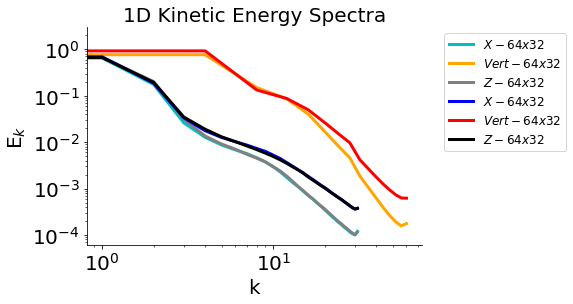

In [163]:
spec = 'keSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'
plt.plot(test[1][spec].iloc[0:32], label=r'$X - 64x32$', linestyle="solid", linewidth=3, color='c')
plt.plot(test[2][spec].iloc[0:16], label=r'$Vert - 64x32$', linestyle="solid", linewidth=3, color='orange')
plt.plot(test[3][spec].iloc[0:32], label=r'$Z - 64x32$', linestyle="solid", linewidth=3, color='gray')
plt.plot(outputSTAMD[1][spec].iloc[0:32], label=r'$X - 64x32$', linestyle="solid", linewidth=3, color='b')
plt.plot(outputSTAMD[2][spec].iloc[0:16], label=r'$Vert - 64x32$', linestyle="solid", linewidth=3, color='red')
plt.plot(outputSTAMD[3][spec].iloc[0:32], label=r'$Z - 64x32$', linestyle="solid", linewidth=3, color='black')
plt.yscale('log')
plt.xscale('log')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt)
#plt.xlim(0,5)
plt.show()

In [175]:
a = [2,6,7]

In [178]:
'spec-' + 'fjoeg' + str(a[0]) + 'ge.a'

'spec-fjoeg2ge.a'

In [179]:
import pickle

In [6]:
base = '/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/pp-python/'

DNS_N15_6432 = pickle.load( open( base + "spec-DNS-N15-512128-Eps084-6432.p", "rb" ) )
AMD_N15_6432 = pickle.load( open( base + "spec-STAMD-N15-512128-6432-Eps084.p", "rb" ) )
MQM_N15_6432 = pickle.load( open( base + "spec-EXPMQM-N15-512128-6432-Eps084.p", "rb" ) )
M43_N15_6432 = pickle.load( open( base + "spec-M43-N15-512128-6432-Eps084.p", "rb" ) )
QIJ_N15_6432 = pickle.load( open( base + "spec-EXPQ-N15-512128-6432-Eps084.p", "rb" ) )
SMA_N15_6432 = pickle.load( open( base + "spec-SMAG-N15-512128-6432-Eps084.p", "rb" ) )

DNS_N15_6464 = pickle.load( open( base + "spec-DNS-N15-512128-Eps084-6464.p", "rb" ) )
AMD_N15_6464 = pickle.load( open( base + "spec-STAMD-N15-512128-6464-Eps084.p", "rb" ) )
MQM_N15_6464 = pickle.load( open( base + "spec-EXPMQM-N15-512128-6464-Eps084.p", "rb" ) )
M43_N15_6464 = pickle.load( open( base + "spec-M43-N15-512128-6464-Eps084.p", "rb" ) )
QIJ_N15_6464 = pickle.load( open( base + "spec-EXPQ-N15-512128-6464-Eps084.p", "rb" ) )
SMA_N15_6464 = pickle.load( open( base + "spec-SMAG-N15-512128-6464-Eps084.p", "rb" ) )

DNS_N15_6416 = pickle.load( open( base + "spec-DNS-N15-512128-Eps084-6416.p", "rb" ) )
AMD_N15_6416 = pickle.load( open( base + "spec-STAMD-N15-512128-6416-Eps084.p", "rb" ) )
MQM_N15_6416 = pickle.load( open( base + "spec-EXPMQM-N15-512128-6416-Eps084.p", "rb" ) )
M43_N15_6416 = pickle.load( open( base + "spec-M43-N15-512128-6416-Eps084.p", "rb" ) )
QIJ_N15_6416 = pickle.load( open( base + "spec-EXPQ-N15-512128-6416-Eps084.p", "rb" ) )
SMA_N15_6416 = pickle.load( open( base + "spec-SMAG-N15-512128-6416-Eps084.p", "rb" ) )

DNS_N15_64128 = pickle.load( open( base + "spec-DNS-N15-512128-Eps084-64128.p", "rb" ) )
AMD_N15_64128 = pickle.load( open( base + "spec-STAMD-N15-512128-64128-Eps084.p", "rb" ) )
MQM_N15_64128 = pickle.load( open( base + "spec-EXPMQM-N15-512128-64128-Eps084.p", "rb" ) )
M43_N15_64128 = pickle.load( open( base + "spec-M43-N15-512128-64128-Eps084.p", "rb" ) )
QIJ_N15_64128 = pickle.load( open( base + "spec-EXPQ-N15-512128-64128-Eps084.p", "rb" ) )
SMA_N15_64128 = pickle.load( open( base + "spec-SMAG-N15-512128-64128-Eps084.p", "rb" ) )

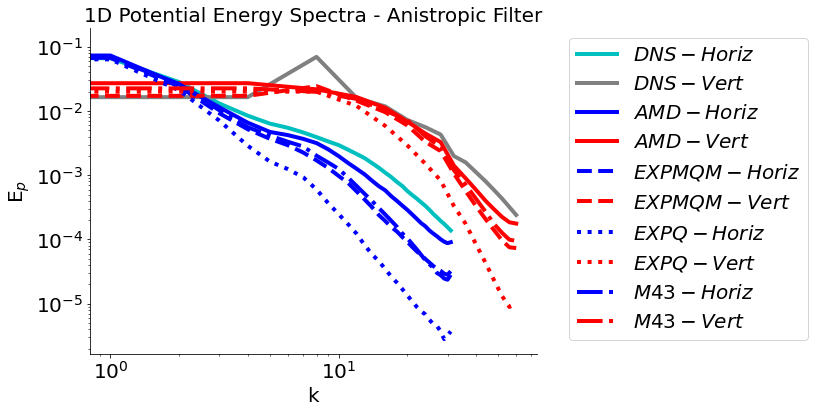

In [251]:
spec = 'peSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'
plt.plot(DNS_N15_6432[1][spec].iloc[0:32], label=r'$DNS - Horiz$', linestyle="solid", linewidth=4, color='c')
plt.plot(DNS_N15_6432[2][spec].iloc[0:16], label=r'$DNS - Vert$', linestyle="solid", linewidth=4, color='gray')
#plt.plot(DNS_N15_6432[3][spec].iloc[0:32], label=r'$DNS - Z$', linestyle="solid", linewidth=4, color='gray')
plt.plot(AMD_N15_6432[1][spec].iloc[0:32], label=r'$AMD - Horiz$', linestyle="solid", linewidth=4, color='b')
plt.plot(AMD_N15_6432[2][spec].iloc[0:16], label=r'$AMD - Vert$', linestyle="solid", linewidth=4, color='red')
#plt.plot(AMD_N15_6432[3][spec].iloc[0:32], label=r'$AMD - Z$', linestyle="solid", linewidth=4, color='black')
plt.plot(MQM_N15_6432[1][spec].iloc[0:32], label=r'$EXPMQM - Horiz$', linestyle="dashed", linewidth=4, color='b')
plt.plot(MQM_N15_6432[2][spec].iloc[0:16], label=r'$EXPMQM - Vert$', linestyle="dashed", linewidth=4, color='red')
#plt.plot(MQM_N15_6432[3][spec].iloc[0:32], label=r'$MQM - Z$', linestyle="dashed", linewidth=3, color='black')
plt.plot(QIJ_N15_6432[1][spec].iloc[0:32], label=r'$EXPQ - Horiz$', linestyle="dotted", linewidth=4, color='b')
plt.plot(QIJ_N15_6432[2][spec].iloc[0:16], label=r'$EXPQ - Vert$', linestyle="dotted", linewidth=4, color='red')
#plt.plot(QIJ_N15_6432[3][spec].iloc[0:32], label=r'$QIJ - Z$', linestyle="dotted", linewidth=4, color='black')
plt.plot(M43_N15_6432[1][spec].iloc[0:32], label=r'$M43 - Horiz$', linestyle="dashdot", linewidth=4, color='b')
plt.plot(M43_N15_6432[2][spec].iloc[0:16], label=r'$M43 - Vert$', linestyle="dashdot", linewidth=4, color='red')
#plt.plot(M43_N15_6432[3][spec].iloc[0:32], label=r'$M43 - Z$', linestyle="dashdot", linewidth=4, color='black')
#plt.plot(SMA_N15_6432[1][spec].iloc[0:32], label=r'$SMA - X$', linestyle="solid", linewidth=4, color='y')
#plt.plot(SMA_N15_6432[2][spec].iloc[0:16], label=r'$SMA - Vert$', linestyle="solid", linewidth=4, color='y')
#plt.plot(SMA_N15_6432[3][spec].iloc[0:32], label=r'$SMA - Z$', linestyle="solid", linewidth=4, color='y')
plt.yscale('log')
plt.xscale('log')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt, titleNote='Anistropic Filter')
#plt.xlim(0,5)
plt.show()

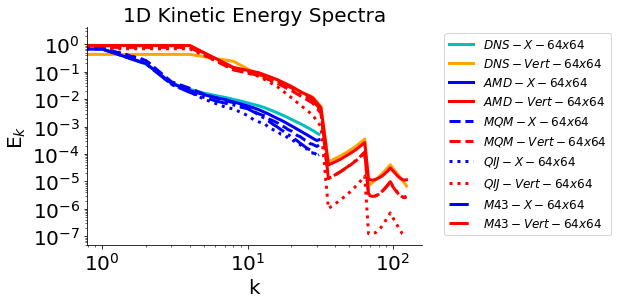

In [206]:
spec = 'keSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'
plt.plot(DNS_N15_6464[1][spec].iloc[0:32], label=r'$DNS - X - 64x64$', linestyle="solid", linewidth=3, color='c')
plt.plot(DNS_N15_6464[2][spec].iloc[0:32], label=r'$DNS - Vert - 64x64$', linestyle="solid", linewidth=3, color='orange')
#plt.plot(DNS_N15_6464[3][spec].iloc[0:32], label=r'$DNS - Z - 64x64$', linestyle="solid", linewidth=3, color='gray')
plt.plot(AMD_N15_6464[1][spec].iloc[0:32], label=r'$AMD - X - 64x64$', linestyle="solid", linewidth=3, color='b')
plt.plot(AMD_N15_6464[2][spec].iloc[0:32], label=r'$AMD - Vert - 64x64$', linestyle="solid", linewidth=3, color='red')
#plt.plot(AMD_N15_6464[3][spec].iloc[0:32], label=r'$AMD - Z - 64x64$', linestyle="solid", linewidth=3, color='black')
plt.plot(MQM_N15_6464[1][spec].iloc[0:32], label=r'$MQM - X - 64x64$', linestyle="dashed", linewidth=3, color='b')
plt.plot(MQM_N15_6464[2][spec].iloc[0:32], label=r'$MQM - Vert - 64x64$', linestyle="dashed", linewidth=3, color='red')
#plt.plot(MQM_N15_6464[3][spec].iloc[0:32], label=r'$MQM - Z - 64x64$', linestyle="dashed", linewidth=3, color='black')
plt.plot(QIJ_N15_6464[1][spec].iloc[0:32], label=r'$QIJ - X - 64x64$', linestyle="dotted", linewidth=3, color='b')
plt.plot(QIJ_N15_6464[2][spec].iloc[0:32], label=r'$QIJ - Vert - 64x64$', linestyle="dotted", linewidth=3, color='red')
#plt.plot(QIJ_N15_6464[3][spec].iloc[0:32], label=r'$QIJ - Z - 64x64$', linestyle="dotted", linewidth=3, color='black')
plt.plot(M43_N15_6464[1][spec].iloc[0:32], label=r'$M43 - X - 64x64$', linestyle="dashdot", linewidth=3, color='b')
plt.plot(M43_N15_6464[2][spec].iloc[0:32], label=r'$M43 - Vert - 64x64$', linestyle="dashdot", linewidth=3, color='red')
#plt.plot(M43_N15_6464[3][spec].iloc[0:32], label=r'$M43 - Z - 64x64$', linestyle="dashdot", linewidth=3, color='black')
#plt.plot(SMA_N15_6464[1][spec].iloc[0:32], label=r'$SMA - X - 64x64$', linestyle="solid", linewidth=3, color='y')
#plt.plot(SMA_N15_6464[2][spec].iloc[0:32], label=r'$SMA - Vert - 64x64$', linestyle="solid", linewidth=3, color='y')
#plt.plot(SMA_N15_6464[3][spec].iloc[0:32], label=r'$SMA - Z - 64x64$', linestyle="solid", linewidth=3, color='y')
plt.yscale('log')
plt.xscale('log')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt)
#plt.xlim(0,5)
plt.show()

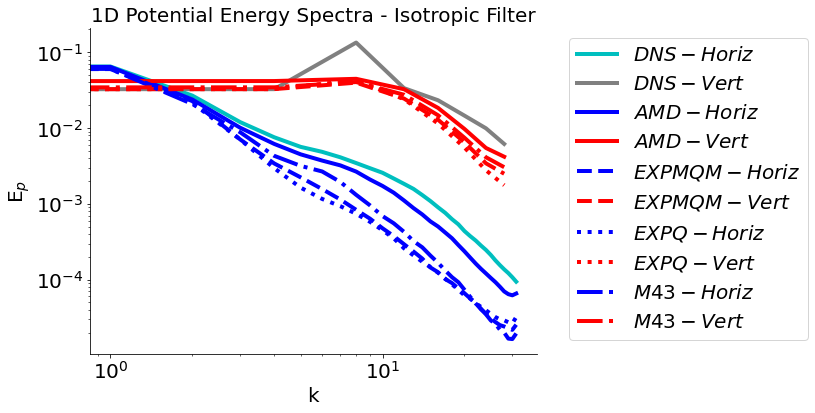

In [247]:
spec = 'peSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'
plt.plot(DNS_N15_6416[1][spec].iloc[0:32], label=r'$DNS - Horiz$', linestyle="solid", linewidth=4, color='c')
plt.plot(DNS_N15_6416[2][spec].iloc[0:8], label=r'$DNS - Vert$', linestyle="solid", linewidth=4, color='gray')
#plt.plot(DNS_N15_6416[3][spec].iloc[0:32], label=r'$DNS - Z$', linestyle="solid", linewidth=4, color='gray')
plt.plot(AMD_N15_6416[1][spec].iloc[0:32], label=r'$AMD - Horiz$', linestyle="solid", linewidth=4, color='b')
plt.plot(AMD_N15_6416[2][spec].iloc[0:8], label=r'$AMD - Vert$', linestyle="solid", linewidth=4, color='red')
#plt.plot(AMD_N15_6416[3][spec].iloc[0:32], label=r'$AMD - Z$', linestyle="solid", linewidth=4, color='black')
plt.plot(MQM_N15_6416[1][spec].iloc[0:32], label=r'$EXPMQM - Horiz$', linestyle="dashed", linewidth=4, color='b')
plt.plot(MQM_N15_6416[2][spec].iloc[0:8], label=r'$EXPMQM - Vert$', linestyle="dashed", linewidth=4, color='red')
#plt.plot(MQM_N15_6416[3][spec].iloc[0:32], label=r'$MQM - Z$', linestyle="dashed", linewidth=3, color='black')
plt.plot(QIJ_N15_6416[1][spec].iloc[0:32], label=r'$EXPQ - Horiz$', linestyle="dotted", linewidth=4, color='b')
plt.plot(QIJ_N15_6416[2][spec].iloc[0:8], label=r'$EXPQ - Vert$', linestyle="dotted", linewidth=4, color='red')
#plt.plot(QIJ_N15_6416[3][spec].iloc[0:32], label=r'$QIJ - Z$', linestyle="dotted", linewidth=4, color='black')
plt.plot(M43_N15_6416[1][spec].iloc[0:32], label=r'$M43 - Horiz$', linestyle="dashdot", linewidth=4, color='b')
plt.plot(M43_N15_6416[2][spec].iloc[0:8], label=r'$M43 - Vert$', linestyle="dashdot", linewidth=4, color='red')
#plt.plot(M43_N15_6416[3][spec].iloc[0:32], label=r'$M43 - Z$', linestyle="dashdot", linewidth=4, color='black')
#plt.plot(SMA_N15_6416[1][spec].iloc[0:32], label=r'$SMA - X$', linestyle="solid", linewidth=4, color='y')
#plt.plot(SMA_N15_6416[2][spec].iloc[0:8], label=r'$SMA - Vert$', linestyle="solid", linewidth=4, color='y')
#plt.plot(SMA_N15_6416[3][spec].iloc[0:32], label=r'$SMA - Z$', linestyle="solid", linewidth=4, color='y')
plt.yscale('log')
plt.xscale('log')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt, titleNote='Isotropic Filter')
#plt.xlim(0,5)
plt.show()

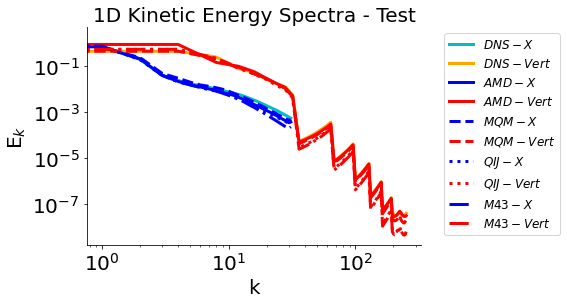

In [234]:
spec = 'keSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'
plt.plot(DNS_N15_64128[1][spec].iloc[0:32], label=r'$DNS - X$', linestyle="solid", linewidth=3, color='c')
plt.plot(DNS_N15_64128[2][spec].iloc[0:64], label=r'$DNS - Vert$', linestyle="solid", linewidth=3, color='orange')
#plt.plot(DNS_N15_64128[3][spec].iloc[0:32], label=r'$DNS - Z$', linestyle="solid", linewidth=3, color='gray')
plt.plot(AMD_N15_64128[1][spec].iloc[0:32], label=r'$AMD - X$', linestyle="solid", linewidth=3, color='b')
plt.plot(AMD_N15_64128[2][spec].iloc[0:64], label=r'$AMD - Vert$', linestyle="solid", linewidth=3, color='red')
#plt.plot(AMD_N15_64128[3][spec].iloc[0:32], label=r'$AMD - Z$', linestyle="solid", linewidth=3, color='black')
plt.plot(MQM_N15_64128[1][spec].iloc[0:32], label=r'$MQM - X$', linestyle="dashed", linewidth=3, color='b')
plt.plot(MQM_N15_64128[2][spec].iloc[0:64], label=r'$MQM - Vert$', linestyle="dashed", linewidth=3, color='red')
#plt.plot(MQM_N15_64128[3][spec].iloc[0:32], label=r'$MQM - Z$', linestyle="dashed", linewidth=3, color='black')
plt.plot(QIJ_N15_64128[1][spec].iloc[0:32], label=r'$QIJ - X$', linestyle="dotted", linewidth=3, color='b')
plt.plot(QIJ_N15_64128[2][spec].iloc[0:64], label=r'$QIJ - Vert$', linestyle="dotted", linewidth=3, color='red')
#plt.plot(QIJ_N15_64128[3][spec].iloc[0:32], label=r'$QIJ - Z$', linestyle="dotted", linewidth=3, color='black')
plt.plot(M43_N15_64128[1][spec].iloc[0:32], label=r'$M43 - X$', linestyle="dashdot", linewidth=3, color='b')
plt.plot(M43_N15_64128[2][spec].iloc[0:64], label=r'$M43 - Vert$', linestyle="dashdot", linewidth=3, color='red')
#plt.plot(M43_N15_64128[3][spec].iloc[0:32], label=r'$M43 - Z$', linestyle="dashdot", linewidth=3, color='black')
#plt.plot(SMA_N15_64128[1][spec].iloc[0:32], label=r'$SMA - X$', linestyle="solid", linewidth=3, color='y')
#plt.plot(SMA_N15_64128[2][spec].iloc[0:8], label=r'$SMA - Vert$', linestyle="solid", linewidth=3, color='y')
#plt.plot(SMA_N15_64128[3][spec].iloc[0:32], label=r'$SMA - Z$', linestyle="solid", linewidth=3, color='y')
plt.yscale('log')
plt.xscale('log')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt, titleNote="Test")
#plt.xlim(0,5)
plt.show()

In [5]:
import pickle
base = '/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/pp-python/'

M43_N15_6432_Pr2 = pickle.load( open( base + "spec-M43-N15-512128-6432-Eps084-Pr2.p", "rb" ) )
M43_N15_6432_Pr5 = pickle.load( open( base + "spec-M43-N15-512128-6432-Eps084-Pr5.p", "rb" ) )
M43_N15_6432_Pr05 = pickle.load( open( base + "spec-M43-N15-512128-6432-Eps084-Pr05.p", "rb" ) )
M43_N15_6432_Pr02 = pickle.load( open( base + "spec-M43-N15-512128-6432-Eps084-Pr02.p", "rb" ) )

QIJ_N15_6432_Pr2 = pickle.load( open( base + "spec-EXPQ-N15-512128-6432-Eps084-Pr2.p", "rb" ) )
QIJ_N15_6432_Pr5 = pickle.load( open( base + "spec-EXPQ-N15-512128-6432-Eps084-Pr5.p", "rb" ) )
QIJ_N15_6432_Pr05 = pickle.load( open( base + "spec-EXPQ-N15-512128-6432-Eps084-Pr05.p", "rb" ) )
QIJ_N15_6432_Pr02 = pickle.load( open( base + "spec-EXPQ-N15-512128-6432-Eps084-Pr02.p", "rb" ) )

SMAG_N15_6432_Pr2 = pickle.load( open( base + "spec-SMAG-N15-512128-6432-Eps084-Pr2.p", "rb" ) )
SMAG_N15_6432_Pr5 = pickle.load( open( base + "spec-SMAG-N15-512128-6432-Eps084-Pr5.p", "rb" ) )
SMAG_N15_6432_Pr05 = pickle.load( open( base + "spec-SMAG-N15-512128-6432-Eps084-Pr05.p", "rb" ) )
SMAG_N15_6432_Pr02 = pickle.load( open( base + "spec-SMAG-N15-512128-6432-Eps084-Pr02.p", "rb" ) )

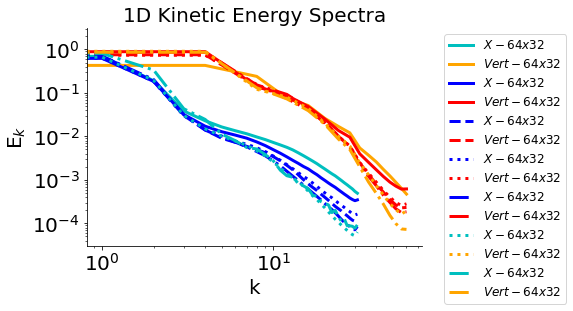

In [226]:
spec = 'keSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'
plt.plot(DNS_N15_6432[1][spec].iloc[0:32], label=r'$X - 64x32$', linestyle="solid", linewidth=3, color='c')
plt.plot(DNS_N15_6432[2][spec].iloc[0:16], label=r'$Vert - 64x32$', linestyle="solid", linewidth=3, color='orange')

plt.plot(AMD_N15_6432[1][spec].iloc[0:32], label=r'$X - 64x32$', linestyle="solid", linewidth=3, color='b')
plt.plot(AMD_N15_6432[2][spec].iloc[0:16], label=r'$Vert - 64x32$', linestyle="solid", linewidth=3, color='red')

plt.plot(M43_N15_6432_Pr2[1][spec].iloc[0:32], label=r'$X - 64x32$', linestyle="dashed", linewidth=3, color='b')
plt.plot(M43_N15_6432_Pr2[2][spec].iloc[0:16], label=r'$Vert - 64x32$', linestyle="dashed", linewidth=3, color='red')

plt.plot(M43_N15_6432_Pr5[1][spec].iloc[0:32], label=r'$X - 64x32$', linestyle="dotted", linewidth=3, color='b')
plt.plot(M43_N15_6432_Pr5[2][spec].iloc[0:16], label=r'$Vert - 64x32$', linestyle="dotted", linewidth=3, color='red')

plt.plot(M43_N15_6432[1][spec].iloc[0:32], label=r'$X - 64x32$', linestyle="dashdot", linewidth=3, color='b')
plt.plot(M43_N15_6432[2][spec].iloc[0:16], label=r'$Vert - 64x32$', linestyle="dashdot", linewidth=3, color='red')

plt.plot(M43_N15_6432_Pr05[1][spec].iloc[0:32], label=r'$X - 64x32$', linestyle="dotted", linewidth=3, color='c')
plt.plot(M43_N15_6432_Pr05[2][spec].iloc[0:16], label=r'$Vert - 64x32$', linestyle="dotted", linewidth=3, color='orange')

plt.plot(M43_N15_6432_Pr02[1][spec].iloc[0:32], label=r'$X - 64x32$', linestyle="dashdot", linewidth=3, color='c')
plt.plot(M43_N15_6432_Pr02[2][spec].iloc[0:16], label=r'$Vert - 64x32$', linestyle="dashdot", linewidth=3, color='orange')

plt.yscale('log')
plt.xscale('log')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt)
#plt.xlim(0,5)
plt.show()

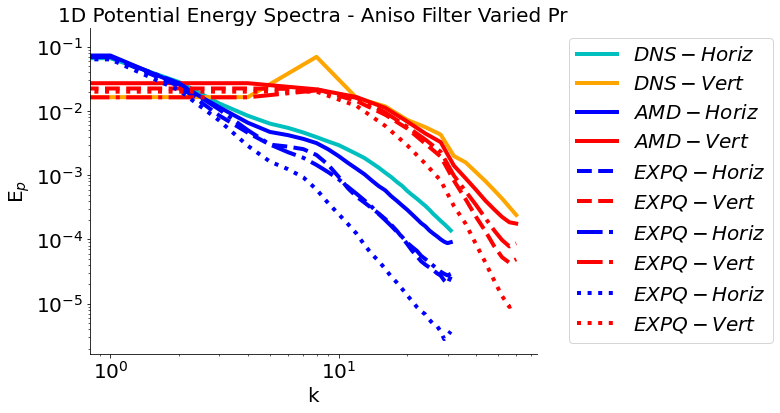

In [255]:
spec = 'peSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'

plt.plot(DNS_N15_6432[1][spec].iloc[0:32], label=r'$DNS - Horiz$', linestyle="solid", linewidth=4, color='c')
plt.plot(DNS_N15_6432[2][spec].iloc[0:16], label=r'$DNS - Vert$', linestyle="solid", linewidth=4, color='orange')

plt.plot(AMD_N15_6432[1][spec].iloc[0:32], label=r'$AMD - Horiz$', linestyle="solid", linewidth=4, color='b')
plt.plot(AMD_N15_6432[2][spec].iloc[0:16], label=r'$AMD - Vert$', linestyle="solid", linewidth=4, color='red')

plt.plot(QIJ_N15_6432_Pr2[1][spec].iloc[0:32], label=r'$EXPQ - Horiz$', linestyle="dashed", linewidth=4, color='b')
plt.plot(QIJ_N15_6432_Pr2[2][spec].iloc[0:16], label=r'$EXPQ - Vert$', linestyle="dashed", linewidth=4, color='red')

plt.plot(QIJ_N15_6432_Pr5[1][spec].iloc[0:32], label=r'$EXPQ - Horiz$', linestyle="dashdot", linewidth=4, color='b')
plt.plot(QIJ_N15_6432_Pr5[2][spec].iloc[0:16], label=r'$EXPQ - Vert$', linestyle="dashdot", linewidth=4, color='red')

plt.plot(QIJ_N15_6432[1][spec].iloc[0:32], label=r'$EXPQ - Horiz$', linestyle="dotted", linewidth=4, color='b')
plt.plot(QIJ_N15_6432[2][spec].iloc[0:16], label=r'$EXPQ - Vert$', linestyle="dotted", linewidth=4, color='red')

plt.yscale('log')
plt.xscale('log')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt, titleNote='Aniso Filter Varied Pr')
#plt.xlim(0,5)
plt.show()

In [239]:
plt.rcParams['figure.figsize'] = [8, 6]

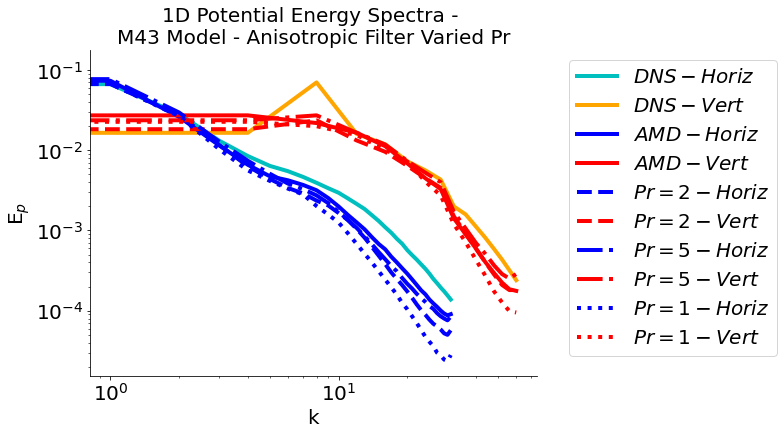

In [264]:
spec = 'peSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'

plt.plot(DNS_N15_6432[1][spec].iloc[0:32], label=r'$DNS - Horiz$', linestyle="solid", linewidth=4, color='c')
plt.plot(DNS_N15_6432[2][spec].iloc[0:16], label=r'$DNS - Vert$', linestyle="solid", linewidth=4, color='orange')

plt.plot(AMD_N15_6432[1][spec].iloc[0:32], label=r'$AMD - Horiz$', linestyle="solid", linewidth=4, color='b')
plt.plot(AMD_N15_6432[2][spec].iloc[0:16], label=r'$AMD - Vert$', linestyle="solid", linewidth=4, color='red')

plt.plot(M43_N15_6432_Pr2[1][spec].iloc[0:32], label=r'$Pr=2 - Horiz$', linestyle="dashed", linewidth=4, color='b')
plt.plot(M43_N15_6432_Pr2[2][spec].iloc[0:16], label=r'$Pr=2 - Vert$', linestyle="dashed", linewidth=4, color='red')

plt.plot(M43_N15_6432_Pr5[1][spec].iloc[0:32], label=r'$Pr=5 - Horiz$', linestyle="dashdot", linewidth=4, color='b')
plt.plot(M43_N15_6432_Pr5[2][spec].iloc[0:16], label=r'$Pr=5 - Vert$', linestyle="dashdot", linewidth=4, color='red')

plt.plot(M43_N15_6432[1][spec].iloc[0:32], label=r'$Pr=1 - Horiz$', linestyle="dotted", linewidth=4, color='b')
plt.plot(M43_N15_6432[2][spec].iloc[0:16], label=r'$Pr=1 - Vert$', linestyle="dotted", linewidth=4, color='red')

plt.yscale('log')
plt.xscale('log')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt, titleNote='\nM43 Model - Anisotropic Filter Varied Pr')
#plt.xlim(0,5)
plt.show()

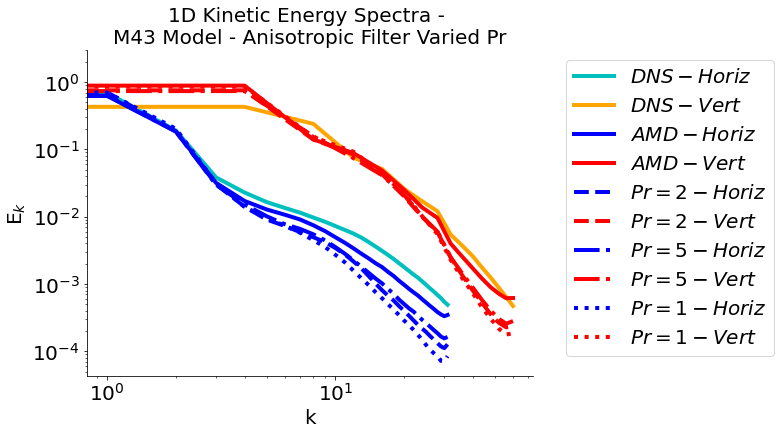

In [8]:
plt.rcParams['figure.figsize'] = [8, 6]
spec = 'keSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'

plt.plot(DNS_N15_6432[1][spec].iloc[0:32], label=r'$DNS - Horiz$', linestyle="solid", linewidth=4, color='c')
plt.plot(DNS_N15_6432[2][spec].iloc[0:16], label=r'$DNS - Vert$', linestyle="solid", linewidth=4, color='orange')

plt.plot(AMD_N15_6432[1][spec].iloc[0:32], label=r'$AMD - Horiz$', linestyle="solid", linewidth=4, color='b')
plt.plot(AMD_N15_6432[2][spec].iloc[0:16], label=r'$AMD - Vert$', linestyle="solid", linewidth=4, color='red')

plt.plot(M43_N15_6432_Pr2[1][spec].iloc[0:32], label=r'$Pr=2 - Horiz$', linestyle="dashed", linewidth=4, color='b')
plt.plot(M43_N15_6432_Pr2[2][spec].iloc[0:16], label=r'$Pr=2 - Vert$', linestyle="dashed", linewidth=4, color='red')

plt.plot(M43_N15_6432_Pr5[1][spec].iloc[0:32], label=r'$Pr=5 - Horiz$', linestyle="dashdot", linewidth=4, color='b')
plt.plot(M43_N15_6432_Pr5[2][spec].iloc[0:16], label=r'$Pr=5 - Vert$', linestyle="dashdot", linewidth=4, color='red')

plt.plot(M43_N15_6432[1][spec].iloc[0:32], label=r'$Pr=1 - Horiz$', linestyle="dotted", linewidth=4, color='b')
plt.plot(M43_N15_6432[2][spec].iloc[0:16], label=r'$Pr=1 - Vert$', linestyle="dotted", linewidth=4, color='red')

plt.yscale('log')
plt.xscale('log')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt, titleNote='\nM43 Model - Anisotropic Filter Varied Pr')
#plt.xlim(0,5)
plt.show()

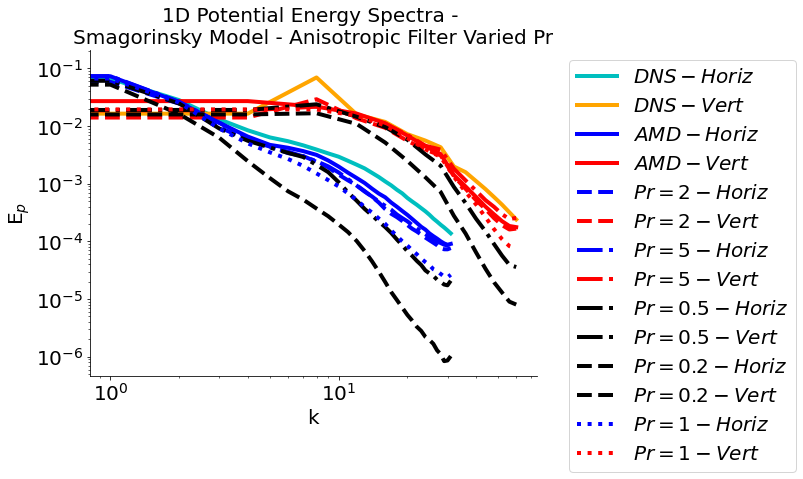

In [16]:
plt.rcParams['figure.figsize'] = [8, 6]
spec = 'peSpec' #'keSpec', 'peSpec', 'keDissSpec', 'peDissSpec'

plt.plot(DNS_N15_6432[1][spec].iloc[0:32], label=r'$DNS - Horiz$', linestyle="solid", linewidth=4, color='c')
plt.plot(DNS_N15_6432[2][spec].iloc[0:16], label=r'$DNS - Vert$', linestyle="solid", linewidth=4, color='orange')

plt.plot(AMD_N15_6432[1][spec].iloc[0:32], label=r'$AMD - Horiz$', linestyle="solid", linewidth=4, color='b')
plt.plot(AMD_N15_6432[2][spec].iloc[0:16], label=r'$AMD - Vert$', linestyle="solid", linewidth=4, color='red')

plt.plot(SMAG_N15_6432_Pr2[1][spec].iloc[0:32], label=r'$Pr=2 - Horiz$', linestyle="dashed", linewidth=4, color='b')
plt.plot(SMAG_N15_6432_Pr2[2][spec].iloc[0:16], label=r'$Pr=2 - Vert$', linestyle="dashed", linewidth=4, color='red')

plt.plot(SMAG_N15_6432_Pr5[1][spec].iloc[0:32], label=r'$Pr=5 - Horiz$', linestyle="dashdot", linewidth=4, color='b')
plt.plot(SMAG_N15_6432_Pr5[2][spec].iloc[0:16], label=r'$Pr=5 - Vert$', linestyle="dashdot", linewidth=4, color='red')

plt.plot(SMAG_N15_6432_Pr05[1][spec].iloc[0:32], label=r'$Pr=0.5 - Horiz$', linestyle="dashdot", linewidth=4, color='k')
plt.plot(SMAG_N15_6432_Pr05[2][spec].iloc[0:16], label=r'$Pr=0.5 - Vert$', linestyle="dashdot", linewidth=4, color='k')

plt.plot(SMAG_N15_6432_Pr02[1][spec].iloc[0:32], label=r'$Pr=0.2 - Horiz$', linestyle="dashed", linewidth=4, color='k')
plt.plot(SMAG_N15_6432_Pr02[2][spec].iloc[0:16], label=r'$Pr=0.2 - Vert$', linestyle="dashed", linewidth=4, color='k')

plt.plot(SMA_N15_6432[1][spec].iloc[0:32], label=r'$Pr=1 - Horiz$', linestyle="dotted", linewidth=4, color='b')
plt.plot(SMA_N15_6432[2][spec].iloc[0:16], label=r'$Pr=1 - Vert$', linestyle="dotted", linewidth=4, color='red')

plt.yscale('log')
plt.xscale('log')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt = annotate(spec, plt, titleNote='\nSmagorinsky Model - Anisotropic Filter Varied Pr')
#plt.xlim(0,5)
plt.show()